In [1]:
library(dplyr)
library(purrr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘purrr’

The following object is masked from ‘package:dplyr’:

    order_by



In [2]:
load('IndigoData.dat')
data_ps <- data %>% filter(event_state == "PRINT_STATE")

## Descriptive Analysis

If we fit a normal distribution on the PRINT_STATE sample, we can determine the critical threshold for the data by features using z-critical regions on a two-tail distribution as we expect unlikely values to be significantly different from the mean.


In [3]:
summ <- data_ps %>% 
  summarise_each(funs = funs(mean(., na.rm = T), sd(., na.rm = T), n()), 
                 PIP_Temperature, IO_temperature, vessel_flow, IO_dirtiness, CS_Voltage, IO_Conductivity, Delta_Pressure) %>%
  mutate(PIP_Temperature.lower.Calculated = qnorm(0.025, PIP_Temperature_mean, PIP_Temperature_sd, lower.tail = T),
         PIP_Temperature.upper.Calculated = qnorm(0.025, PIP_Temperature_mean, PIP_Temperature_sd, lower.tail = F),
         PIP_Temperature.lower.density = dnorm(PIP_Temperature.lower.Calculated, PIP_Temperature_mean, PIP_Temperature_sd),
         PIP_Temperature.upper.density = dnorm(PIP_Temperature.upper.Calculated, PIP_Temperature_mean, PIP_Temperature_sd), 
         PIP_Temperature.lower.Suggested = 250,
         PIP_Temperature.upper.Suggested = 350,               
         PIP_Temperature.lower.Suggested_density = dnorm(PIP_Temperature.lower.Suggested, PIP_Temperature_mean, PIP_Temperature_sd),
         PIP_Temperature.upper.Suggested_density = dnorm(PIP_Temperature.upper.Suggested, PIP_Temperature_mean, PIP_Temperature_sd), 
         PIP_Temperature.lower.Difference = (PIP_Temperature.lower.Calculated - PIP_Temperature.lower.Suggested), 
         PIP_Temperature.upper.Difference = (PIP_Temperature.upper.Calculated - PIP_Temperature.upper.Suggested), 
         PIP_Temperature.lower.d_statistic = round((PIP_Temperature.lower.Difference / PIP_Temperature_sd), 2), 
         PIP_Temperature.upper.d_statistic = round((PIP_Temperature.upper.Difference / PIP_Temperature_sd), 2),
         PIP_Temperature.lower.Proportion = round((PIP_Temperature.lower.Difference / PIP_Temperature.lower.Calculated),2), 
         PIP_Temperature.upper.Proportion = round((PIP_Temperature.upper.Difference / PIP_Temperature.upper.Calculated),2),
         IO_temperature.lower.Calculated = qnorm(0.025, IO_temperature_mean, IO_temperature_sd, lower.tail = T),
         IO_temperature.upper.Calculated = qnorm(0.025, IO_temperature_mean, IO_temperature_sd, lower.tail = F),
         IO_temperature.lower.density = dnorm(IO_temperature.lower.Calculated, IO_temperature_mean, IO_temperature_sd),
         IO_temperature.upper.density = dnorm(IO_temperature.upper.Calculated, IO_temperature_mean, IO_temperature_sd), 
         IO_temperature.lower.Suggested = 250,
         IO_temperature.upper.Suggested = 350,               
         IO_temperature.lower.Suggested_density = dnorm(IO_temperature.lower.Suggested, IO_temperature_mean, IO_temperature_sd),
         IO_temperature.upper.Suggested_density = dnorm(IO_temperature.upper.Suggested, IO_temperature_mean, IO_temperature_sd), 
         IO_temperature.lower.Difference = (IO_temperature.lower.Calculated - IO_temperature.lower.Suggested), 
         IO_temperature.upper.Difference = (IO_temperature.upper.Calculated - IO_temperature.upper.Suggested),   
         IO_temperature.lower.d_statistic = round((IO_temperature.lower.Difference / IO_temperature_sd), 2), 
         IO_temperature.upper.d_statistic = round((IO_temperature.upper.Difference / IO_temperature_sd), 2),
         IO_temperature.lower.Proportion = round((IO_temperature.lower.Difference / IO_temperature.lower.Calculated),2), 
         IO_temperature.upper.Proportion = round((IO_temperature.upper.Difference / IO_temperature.upper.Calculated),2),
         vessel_flow.lower.Calculated = qnorm(0.025, vessel_flow_mean, vessel_flow_sd, lower.tail = T),
         vessel_flow.upper.Calculated = qnorm(0.025, vessel_flow_mean, vessel_flow_sd, lower.tail = F),
         vessel_flow.lower.density = dnorm(vessel_flow.lower.Calculated, vessel_flow_mean, vessel_flow_sd),
         vessel_flow.upper.density = dnorm(vessel_flow.upper.Calculated, vessel_flow_mean, vessel_flow_sd), 
         vessel_flow.lower.Suggested = 3800,
         vessel_flow.upper.Suggested = 4600,               
         vessel_flow.lower.Suggested_density = dnorm(vessel_flow.lower.Suggested, vessel_flow_mean, vessel_flow_sd),
         vessel_flow.upper.Suggested_density = dnorm(vessel_flow.upper.Suggested, vessel_flow_mean, vessel_flow_sd),   
         vessel_flow.lower.Difference = (vessel_flow.lower.Calculated - vessel_flow.lower.Suggested), 
         vessel_flow.upper.Difference = (vessel_flow.upper.Calculated - vessel_flow.upper.Suggested),   
         vessel_flow.lower.d_statistic = round((vessel_flow.lower.Difference / vessel_flow_sd), 2), 
         vessel_flow.upper.d_statistic = round((vessel_flow.upper.Difference / vessel_flow_sd), 2),
         vessel_flow.lower.Proportion = round((vessel_flow.lower.Difference / vessel_flow.lower.Calculated),2), 
         vessel_flow.upper.Proportion = round((vessel_flow.upper.Difference / vessel_flow.upper.Calculated),2),
         CS_Voltage.lower.Calculated = qnorm(0.025, CS_Voltage_mean, CS_Voltage_sd, lower.tail = T),
         CS_Voltage.upper.Calculated = qnorm(0.025, CS_Voltage_mean, CS_Voltage_sd, lower.tail = F),
         CS_Voltage.lower.density = dnorm(CS_Voltage.lower.Calculated, CS_Voltage_mean, CS_Voltage_sd),
         CS_Voltage.upper.density = dnorm(CS_Voltage.upper.Calculated, CS_Voltage_mean, CS_Voltage_sd), 
         CS_Voltage.lower.Suggested = 1900,
         CS_Voltage.upper.Suggested = 2400,               
         CS_Voltage.lower.Suggested_density = dnorm(CS_Voltage.lower.Suggested, CS_Voltage_mean, CS_Voltage_sd),
         CS_Voltage.upper.Suggested_density = dnorm(CS_Voltage.upper.Suggested, CS_Voltage_mean, CS_Voltage_sd),   
         CS_Voltage.lower.Difference = (CS_Voltage.lower.Calculated - CS_Voltage.lower.Suggested), 
         CS_Voltage.upper.Difference = (CS_Voltage.upper.Calculated - CS_Voltage.upper.Suggested),   
         CS_Voltage.lower.d_statistic = round((CS_Voltage.lower.Difference / CS_Voltage_sd), 2), 
         CS_Voltage.upper.d_statistic = round((CS_Voltage.upper.Difference / CS_Voltage_sd), 2),
         CS_Voltage.lower.Proportion = round((CS_Voltage.lower.Difference / CS_Voltage.lower.Calculated),2), 
         CS_Voltage.upper.Proportion = round((CS_Voltage.upper.Difference / CS_Voltage.upper.Calculated),2),
         IO_Conductivity.lower.Calculated = qnorm(0.025, IO_Conductivity_mean, IO_Conductivity_sd, lower.tail = T),
         IO_Conductivity.upper.Calculated = qnorm(0.025, IO_Conductivity_mean, IO_Conductivity_sd, lower.tail = F),
         IO_Conductivity.lower.density = dnorm(IO_Conductivity.lower.Calculated, IO_Conductivity_mean, IO_Conductivity_sd),
         IO_Conductivity.upper.density = dnorm(IO_Conductivity.upper.Calculated, IO_Conductivity_mean, IO_Conductivity_sd),
         IO_Conductivity.lower.Suggested = 2,
         IO_Conductivity.upper.Suggested = 10,               
         IO_Conductivity.lower.Suggested_density = dnorm(IO_Conductivity.lower.Suggested, IO_Conductivity_mean, IO_Conductivity_sd),
         IO_Conductivity.upper.Suggested_density = dnorm(IO_Conductivity.upper.Suggested, IO_Conductivity_mean, IO_Conductivity_sd), 
         IO_Conductivity.lower.Difference = (IO_Conductivity.lower.Calculated - IO_Conductivity.lower.Suggested), 
         IO_Conductivity.upper.Difference = (IO_Conductivity.upper.Calculated - IO_Conductivity.upper.Suggested),   
         IO_Conductivity.lower.d_statistic = round((IO_Conductivity.lower.Difference / IO_Conductivity_sd), 2), 
         IO_Conductivity.upper.d_statistic = round((IO_Conductivity.upper.Difference / IO_Conductivity_sd), 2),
         IO_Conductivity.lower.Proportion = round((IO_Conductivity.lower.Difference / IO_Conductivity.lower.Calculated),2), 
         IO_Conductivity.upper.Proportion = round((IO_Conductivity.upper.Difference / IO_Conductivity.upper.Calculated),2),
         IO_dirtiness.lower.Calculated = qnorm(0.025, IO_dirtiness_mean, IO_dirtiness_sd, lower.tail = T),
         IO_dirtiness.upper.Calculated = qnorm(0.025, IO_dirtiness_mean, IO_dirtiness_sd, lower.tail = F),
         IO_dirtiness.lower.density = dnorm(IO_dirtiness.lower.Calculated, IO_dirtiness_mean, IO_dirtiness_sd),
         IO_dirtiness.upper.density = dnorm(IO_dirtiness.upper.Calculated, IO_dirtiness_mean, IO_dirtiness_sd),
         Delta_Pressure.lower.Calculated = qnorm(0.025, Delta_Pressure_mean, Delta_Pressure_sd, lower.tail = T),
         Delta_Pressure.upper.Calculated = qnorm(0.025, Delta_Pressure_mean, Delta_Pressure_sd, lower.tail = F),
         Delta_Pressure.lower.density = dnorm(Delta_Pressure.lower.Calculated, Delta_Pressure_mean, Delta_Pressure_sd),
         Delta_Pressure.upper.density = dnorm(Delta_Pressure.upper.Calculated, Delta_Pressure_mean, Delta_Pressure_sd))

summ %>% gather(key = Feature, value = Value) %>%
         mutate(Feature = gsub("_mean", ".NA.mean", Feature),
                Feature = gsub("_sd", ".NA.sd", Feature),
                Feature = gsub("_n", ".NA.n", Feature)) %>%
         separate(Feature, c("Feature", "Threshold", "Metric"), sep = "[.]") %>%
         filter(Threshold != "NA") %>%
         spread(key = Metric, value = Value) %>%
         select(Feature, Threshold, Calculated, Suggested, Difference, Proportion, d_statistic) %>%
         mutate(Calculated = round(Calculated, 2),
                Difference = round(Difference, 2))


,Feature,Threshold,Calculated,Suggested,Difference,Proportion,d_statistic
1,CS_Voltage,lower,1574.29,1900,-325.71,-0.21,-1.22
2,CS_Voltage,upper,2619.15,2400,219.15,0.08,0.82
3,Delta_Pressure,lower,-37.71,NA,NA,NA,NA
4,Delta_Pressure,upper,64.87,NA,NA,NA,NA
5,IO_Conductivity,lower,1.09,2,-0.91,-0.84,-0.61
6,IO_Conductivity,upper,6.9,10,-3.1,-0.45,-2.1
7,IO_dirtiness,lower,-92.8,NA,NA,NA,NA
8,IO_dirtiness,upper,1435.54,NA,NA,NA,NA
9,IO_temperature,lower,191.86,250,-58.14,-0.3,-1.56
10,IO_temperature,upper,337.56,350,-12.44,-0.04,-0.33


The **d-statistic (Cohen's d)** is a measure of difference in number of standard deviations of the distributions. It gives a different sense of proportion to the **Proportion** (Difference/Calculated) metric.

In [4]:
temp <- data_ps %>%
  mutate(PIP_Temperature.density = dnorm(PIP_Temperature, mean(PIP_Temperature, na.rm = T), sd(PIP_Temperature, na.rm = T)),
         IO_temperature.density = dnorm(IO_temperature, mean(IO_temperature, na.rm = T), sd(IO_temperature, na.rm = T)),
         vessel_flow.density = dnorm(vessel_flow, mean(vessel_flow, na.rm = T), sd(vessel_flow, na.rm = T)),
         CS_Voltage.density = dnorm(CS_Voltage, mean(CS_Voltage, na.rm = T), sd(CS_Voltage, na.rm = T)),
         IO_Conductivity.density = dnorm(IO_Conductivity, mean(IO_Conductivity, na.rm = T), sd(IO_Conductivity, na.rm = T)),
         Delta_Pressure.density = dnorm(Delta_Pressure, mean(Delta_Pressure, na.rm = T), sd(Delta_Pressure, na.rm = T)),
         IO_dirtiness.density = dnorm(IO_dirtiness, mean(IO_dirtiness, na.rm = T), sd(IO_dirtiness, na.rm = T))) %>%
  group_by(Product_Line) %>%
  mutate(PIP_Temperature.grouped_density = dnorm(PIP_Temperature, mean(PIP_Temperature, na.rm = T), sd(PIP_Temperature, na.rm = T)),
         IO_temperature.grouped_density = dnorm(IO_temperature, mean(IO_temperature, na.rm = T), sd(IO_temperature, na.rm = T)),
         vessel_flow.grouped_density = dnorm(vessel_flow, mean(vessel_flow, na.rm = T), sd(vessel_flow, na.rm = T)),
         CS_Voltage.grouped_density = dnorm(CS_Voltage, mean(CS_Voltage, na.rm = T), sd(CS_Voltage, na.rm = T)),
         IO_Conductivity.grouped_density = dnorm(IO_Conductivity, mean(IO_Conductivity, na.rm = T), sd(IO_Conductivity, na.rm = T)),
         Delta_Pressure.grouped_density = dnorm(Delta_Pressure, mean(Delta_Pressure, na.rm = T), sd(Delta_Pressure, na.rm = T)),
         IO_dirtiness.grouped_density = dnorm(IO_dirtiness, mean(IO_dirtiness, na.rm = T), sd(IO_dirtiness, na.rm = T)))

Warning message:
: Removed 19908 rows containing non-finite values (stat_bin).

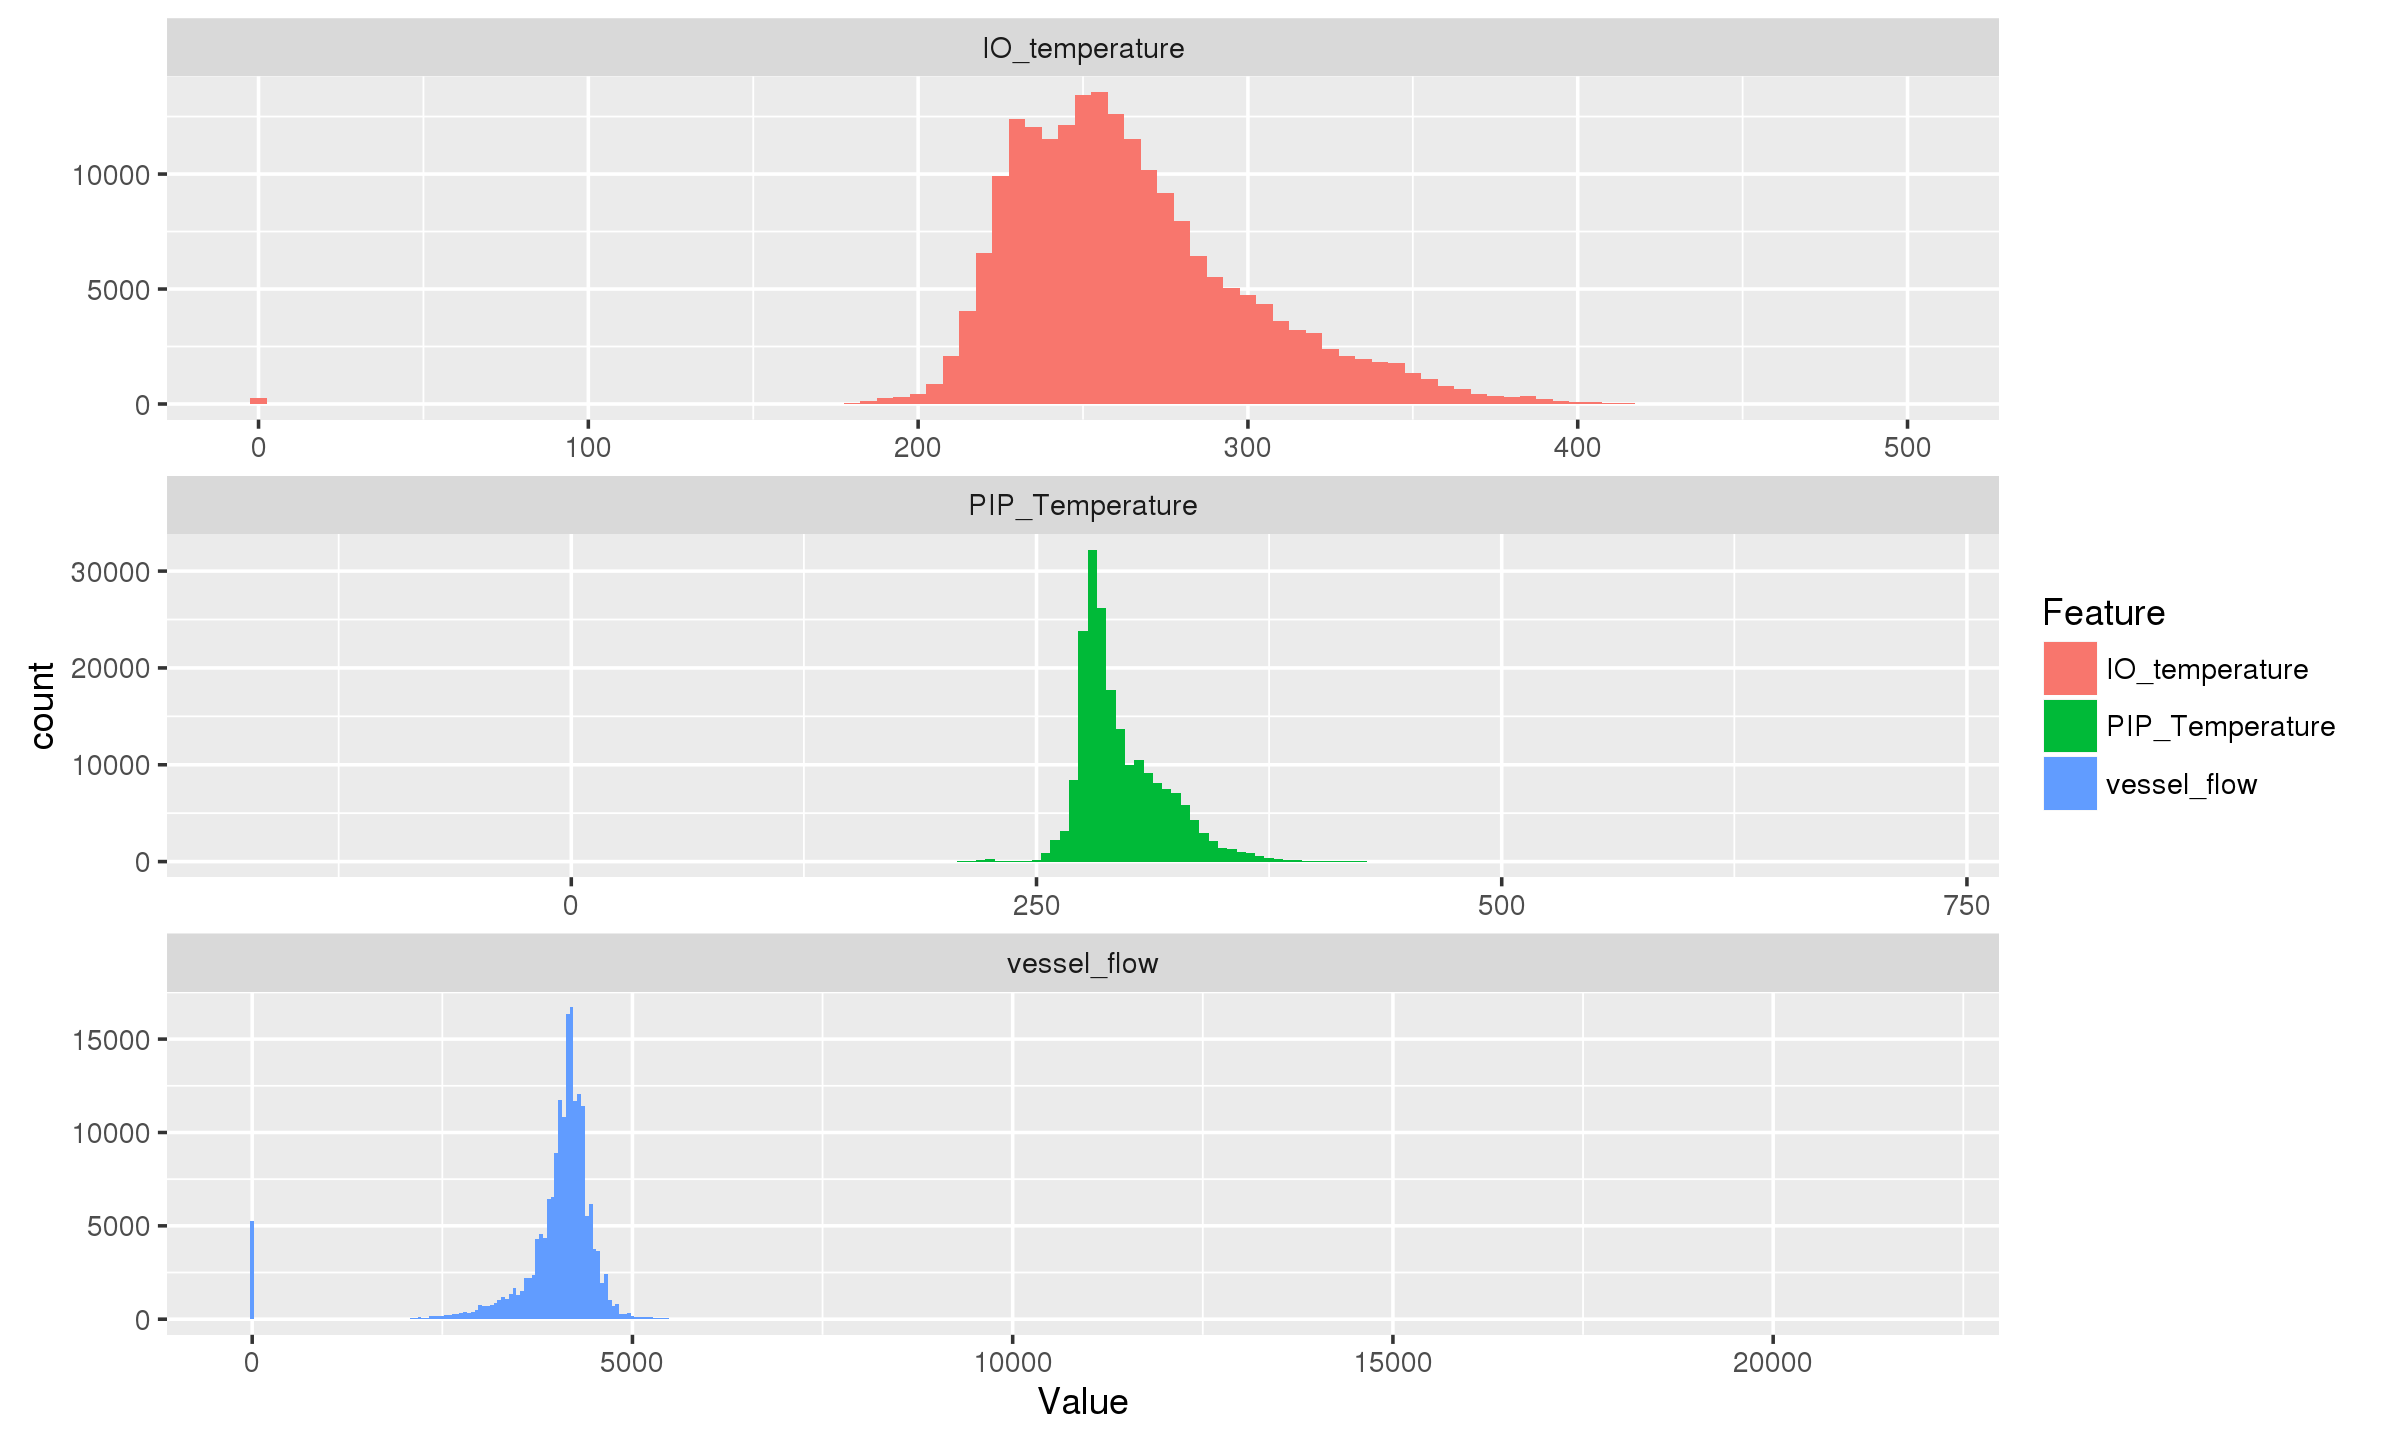

In [5]:
options(repr.plot.width=10, repr.plot.height = 6, repr.plot.res = 240)

hist_data <- temp %>% ungroup() %>%
  select(PIP_Temperature, IO_temperature, vessel_flow) %>%
  gather(key = Feature, value = Value)
hist_data %>%
  ggplot(aes(x = Value, fill = Feature)) +
  geom_histogram(data = hist_data %>% filter(Feature == "PIP_Temperature"), binwidth = 5) +
  geom_histogram(data = hist_data %>% filter(Feature == "IO_temperature"), binwidth = 5) +
  geom_histogram(data = hist_data %>% filter(Feature == "vessel_flow"), binwidth = 50) +
  facet_wrap( ~ Feature, scales = "free", nrow = 3)

rm(hist_data)

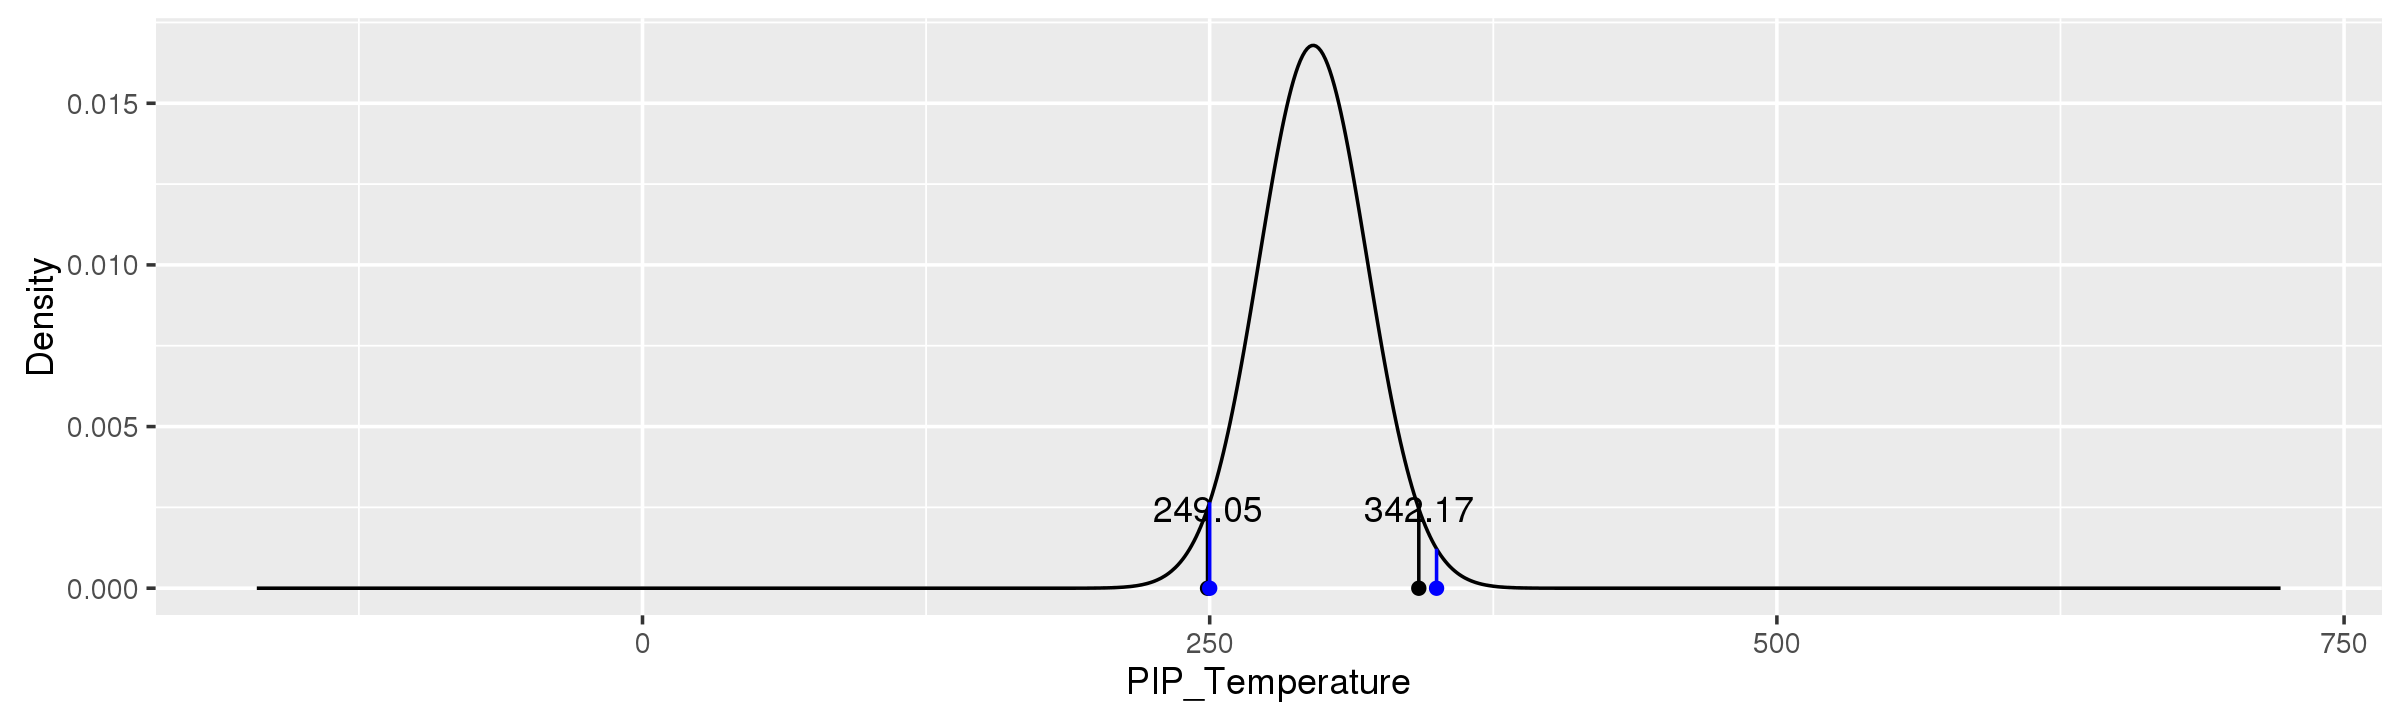

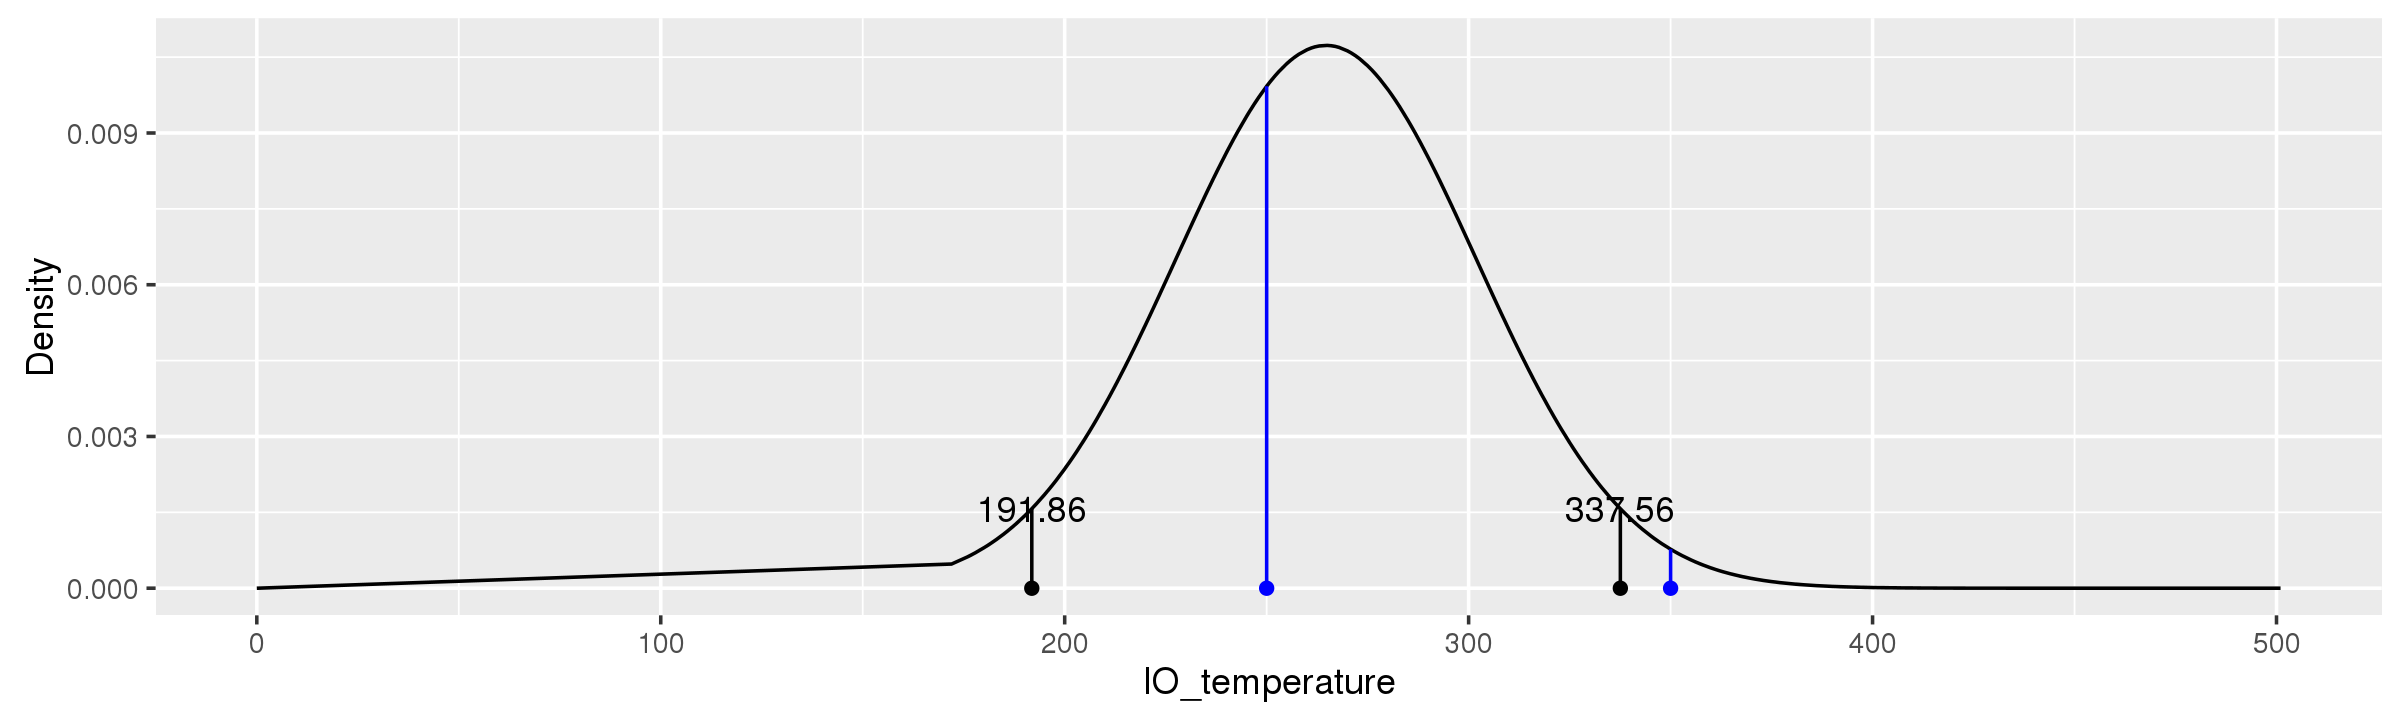

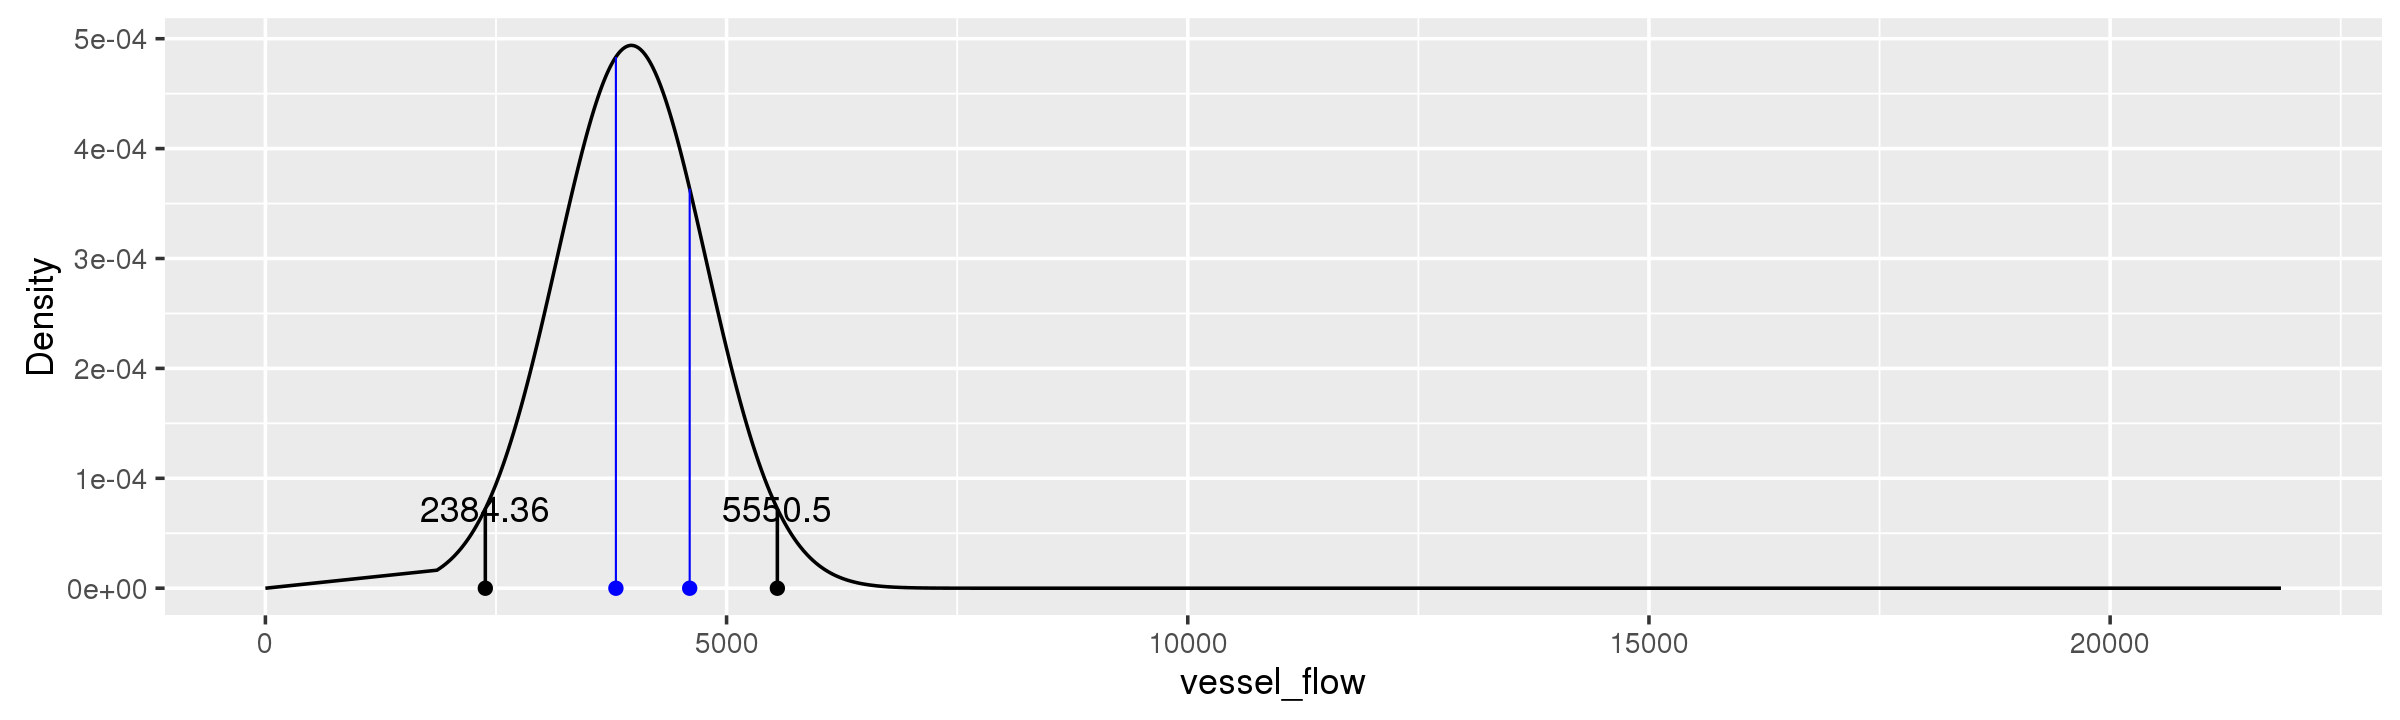

In [6]:
options(repr.plot.width=10, repr.plot.height = 3, repr.plot.res = 240)
temp %>% ggplot(aes(x = PIP_Temperature, y = PIP_Temperature.density)) +
         geom_line() +
         ylab("Density") +
         geom_segment(data = summ, aes(x = PIP_Temperature.lower.Calculated, y = 0, xend = PIP_Temperature.lower.Calculated, yend = PIP_Temperature.lower.density)) +
         geom_segment(data = summ, aes(x = PIP_Temperature.upper.Calculated, y = 0, xend = PIP_Temperature.upper.Calculated, yend = PIP_Temperature.upper.density)) +
         geom_point(data = summ, aes(x = PIP_Temperature.lower.Calculated, y = 0)) +
         geom_point(data = summ, aes(x = PIP_Temperature.upper.Calculated, y = 0)) +
         geom_text(data = summ, aes(x = PIP_Temperature.lower.Calculated, y =PIP_Temperature.lower.density, label = round(PIP_Temperature.lower.Calculated,2))) +
         geom_text(data = summ, aes(x = PIP_Temperature.upper.Calculated, y =PIP_Temperature.upper.density, label = round(PIP_Temperature.upper.Calculated,2))) +
         geom_segment(data = summ, aes(x = 250, y = 0, xend = 250, yend = PIP_Temperature.lower.Suggested_density), col = "blue") +
         geom_segment(data = summ, aes(x = 350, y = 0, xend = 350, yend = PIP_Temperature.upper.Suggested_density), col = "blue") +
         geom_point(data = summ, aes(x = 250, y = 0), col = "blue") +
         geom_point(data = summ, aes(x = 350, y = 0), col = "blue")

temp %>% ggplot(aes(x = IO_temperature, y = IO_temperature.density)) +
         geom_line() +
         ylab("Density") +
         geom_segment(data = summ, aes(x = IO_temperature.lower.Calculated, y = 0, xend = IO_temperature.lower.Calculated, yend = IO_temperature.lower.density)) +
         geom_segment(data = summ, aes(x = IO_temperature.upper.Calculated, y = 0, xend = IO_temperature.upper.Calculated, yend = IO_temperature.upper.density)) +
         geom_point(data = summ, aes(x = IO_temperature.lower.Calculated, y = 0)) +
         geom_point(data = summ, aes(x = IO_temperature.upper.Calculated, y = 0)) +
         geom_text(data = summ, aes(x = IO_temperature.lower.Calculated, y =IO_temperature.lower.density, label = round(IO_temperature.lower.Calculated,2))) +
         geom_text(data = summ, aes(x = IO_temperature.upper.Calculated, y =IO_temperature.upper.density, label = round(IO_temperature.upper.Calculated,2))) +
         geom_segment(data = summ, aes(x = 250, y = 0, xend = 250, yend = IO_temperature.lower.Suggested_density), col = "blue") +
         geom_segment(data = summ, aes(x = 350, y = 0, xend = 350, yend = IO_temperature.upper.Suggested_density), col = "blue") +
         geom_point(data = summ, aes(x = 250, y = 0), col = "blue") +
         geom_point(data = summ, aes(x = 350, y = 0), col = "blue")

temp %>% select(starts_with("vessel_flow")) %>% 
         na.omit() %>% 
         ggplot(aes(x = vessel_flow, y = vessel_flow.density)) +
         geom_line() +
         ylab("Density") +
         geom_segment(data = summ, aes(x = vessel_flow.lower.Calculated, y = 0, xend = vessel_flow.lower.Calculated, yend = vessel_flow.lower.density)) +
         geom_segment(data = summ, aes(x = vessel_flow.upper.Calculated, y = 0, xend = vessel_flow.upper.Calculated, yend = vessel_flow.upper.density)) +
         geom_point(data = summ, aes(x = vessel_flow.lower.Calculated, y = 0)) +
         geom_point(data = summ, aes(x = vessel_flow.upper.Calculated, y = 0)) +
         geom_text(data = summ, aes(x = vessel_flow.lower.Calculated, y =vessel_flow.lower.density, label = round(vessel_flow.lower.Calculated,2))) +
         geom_text(data = summ, aes(x = vessel_flow.upper.Calculated, y =vessel_flow.upper.density, label = round(vessel_flow.upper.Calculated,2))) +
         geom_segment(data = summ, aes(x = 3800, y = 0, xend = 3800, yend = vessel_flow.lower.Suggested_density), col = "blue", size = 0.3) +
         geom_segment(data = summ, aes(x = 4600, y = 0, xend = 4600, yend = vessel_flow.upper.Suggested_density), col = "blue", size = 0.3) +
         geom_point(data = summ, aes(x = 3800, y = 0), col = "blue") +
         geom_point(data = summ, aes(x = 4600, y = 0), col = "blue")



We can see that PIP_Temperature, IO_Temperature, and vessel_flow are better behaved in terms of the variability of the values. They do have some extreme values denoted by the long tails.

Warning message:
: Removed 99027 rows containing non-finite values (stat_bin).

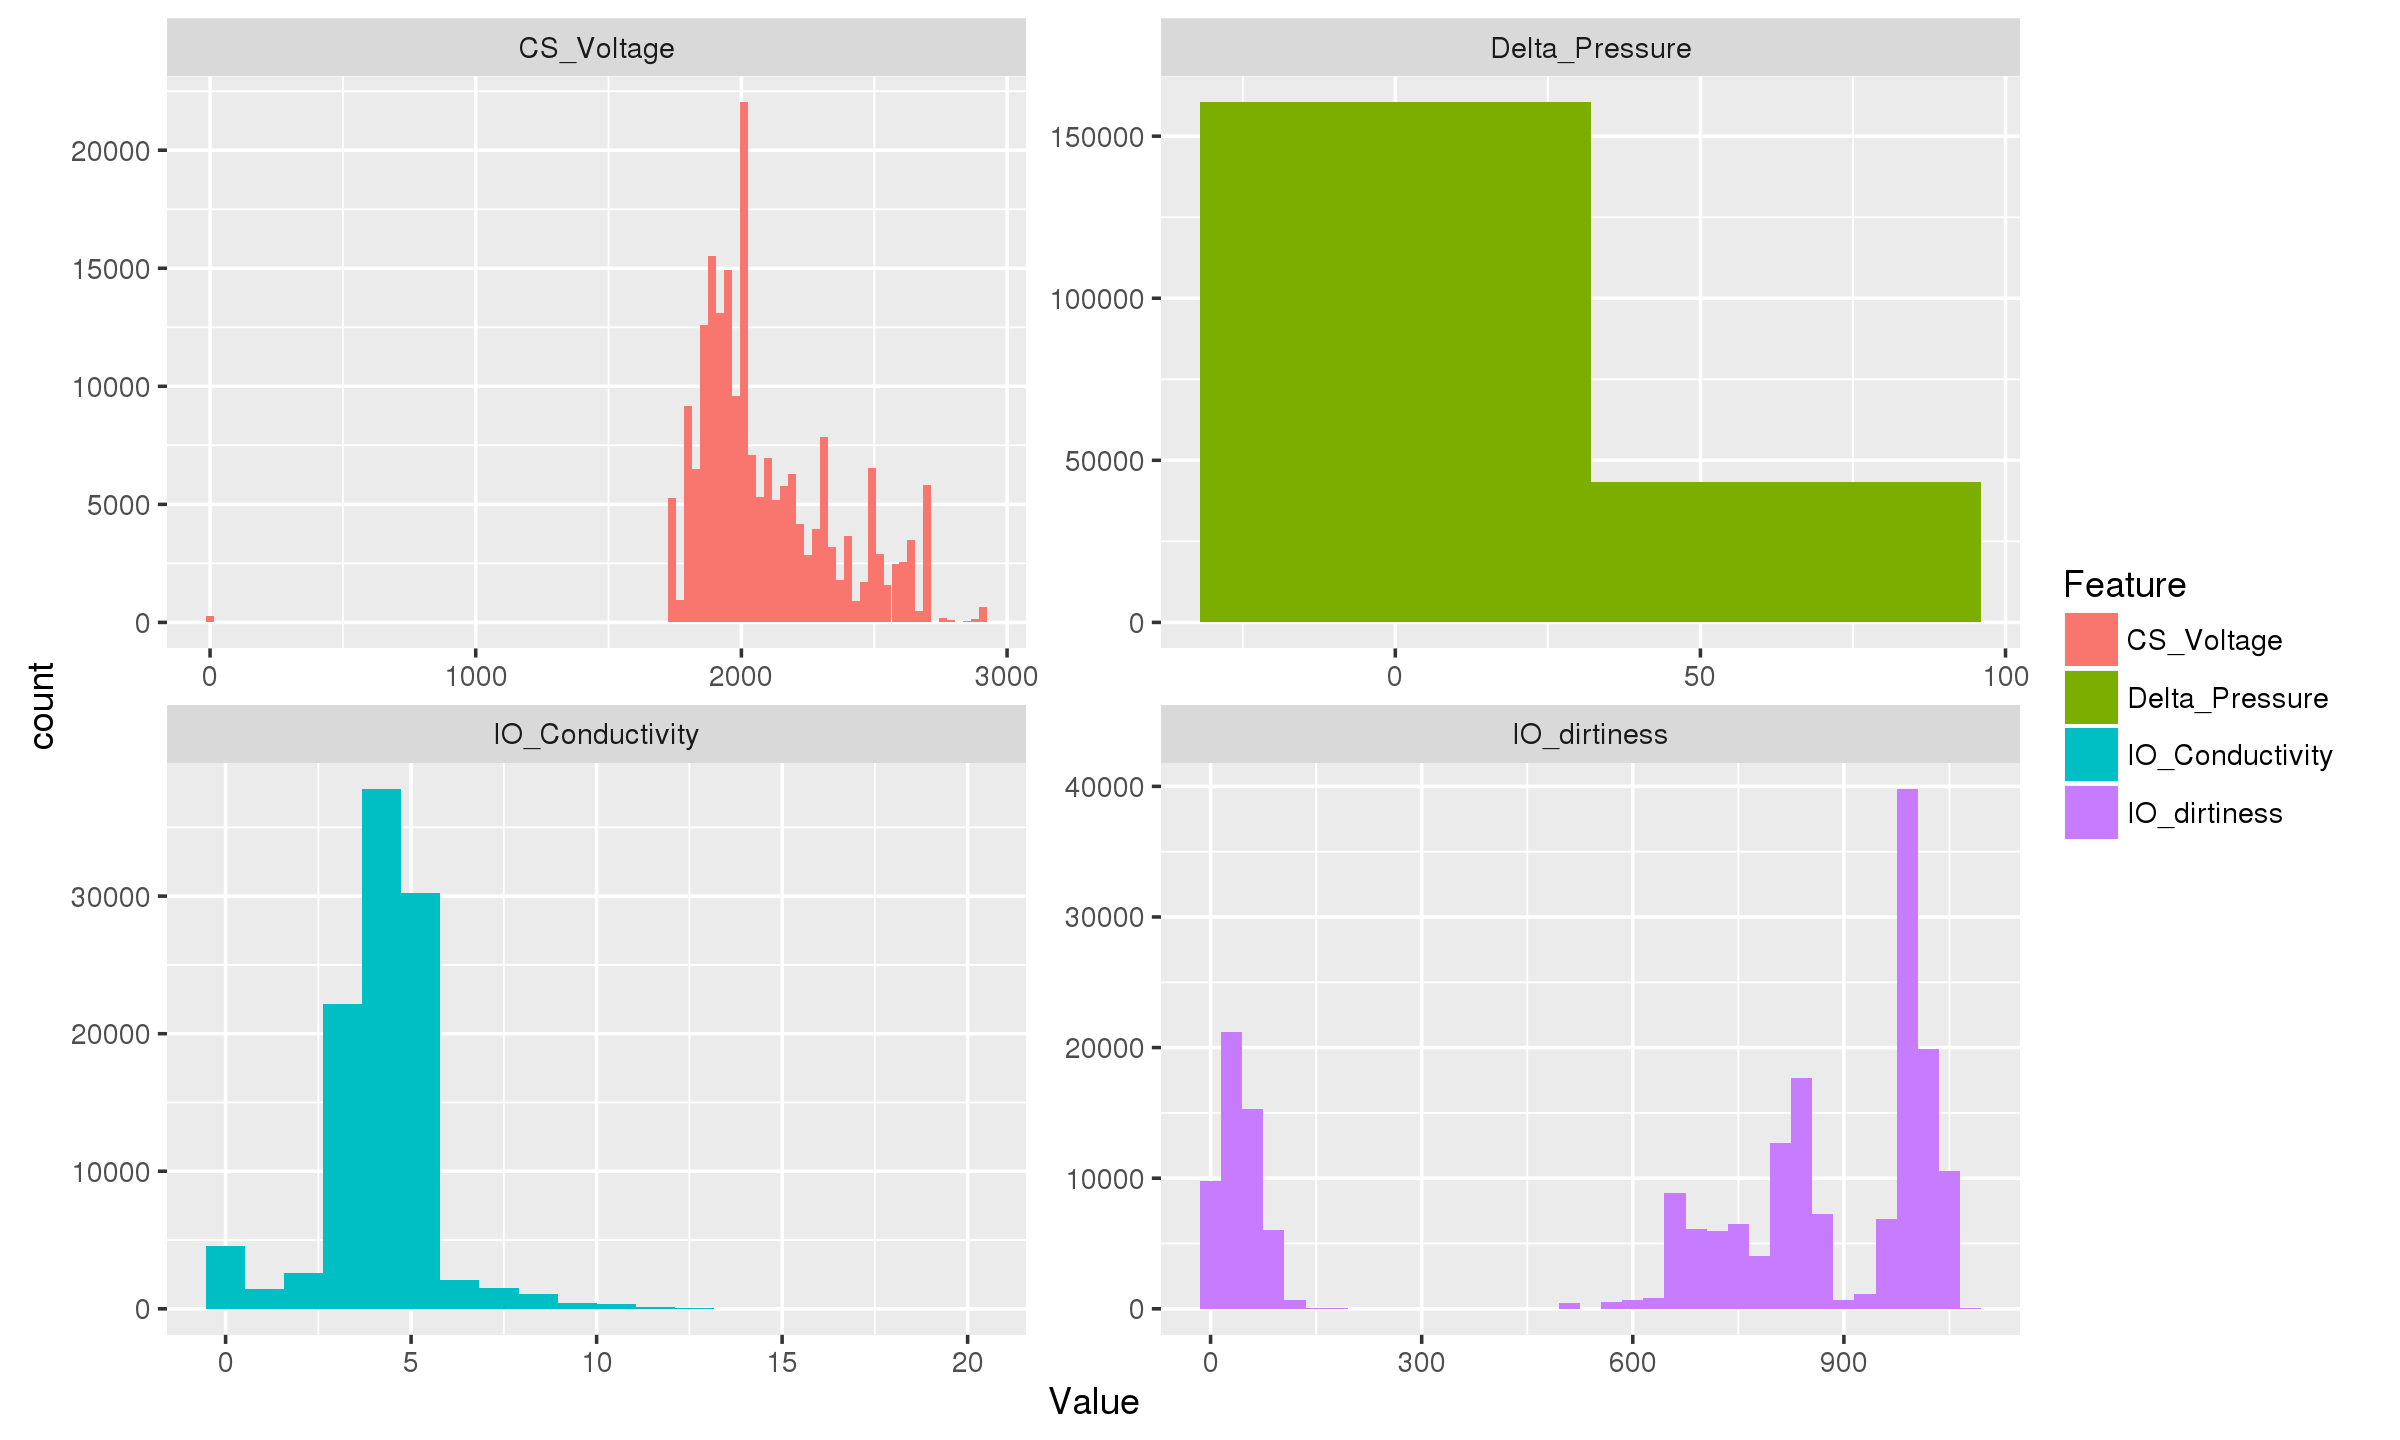

In [7]:
options(repr.plot.width=10, repr.plot.height = 6, repr.plot.res = 240)

hist_data <- temp %>% ungroup() %>%
  select(IO_dirtiness, CS_Voltage, IO_Conductivity, Delta_Pressure ) %>%
  gather(key = Feature, value = Value)
hist_data %>%
  ggplot(aes(x = Value, fill = Feature)) +
  geom_histogram(data = hist_data %>% filter(Feature == "IO_dirtiness"), binwidth = 30) +
  geom_histogram(data = hist_data %>% filter(Feature == "CS_Voltage"), binwidth = 30) +
  geom_histogram(data = hist_data %>% filter(Feature == "IO_Conductivity"), bins = 20) +
  geom_histogram(data = hist_data %>% filter(Feature == "Delta_Pressure"), bins = 2) +
  facet_wrap( ~ Feature, scales = "free", nrow = 3)

rm(hist_data)

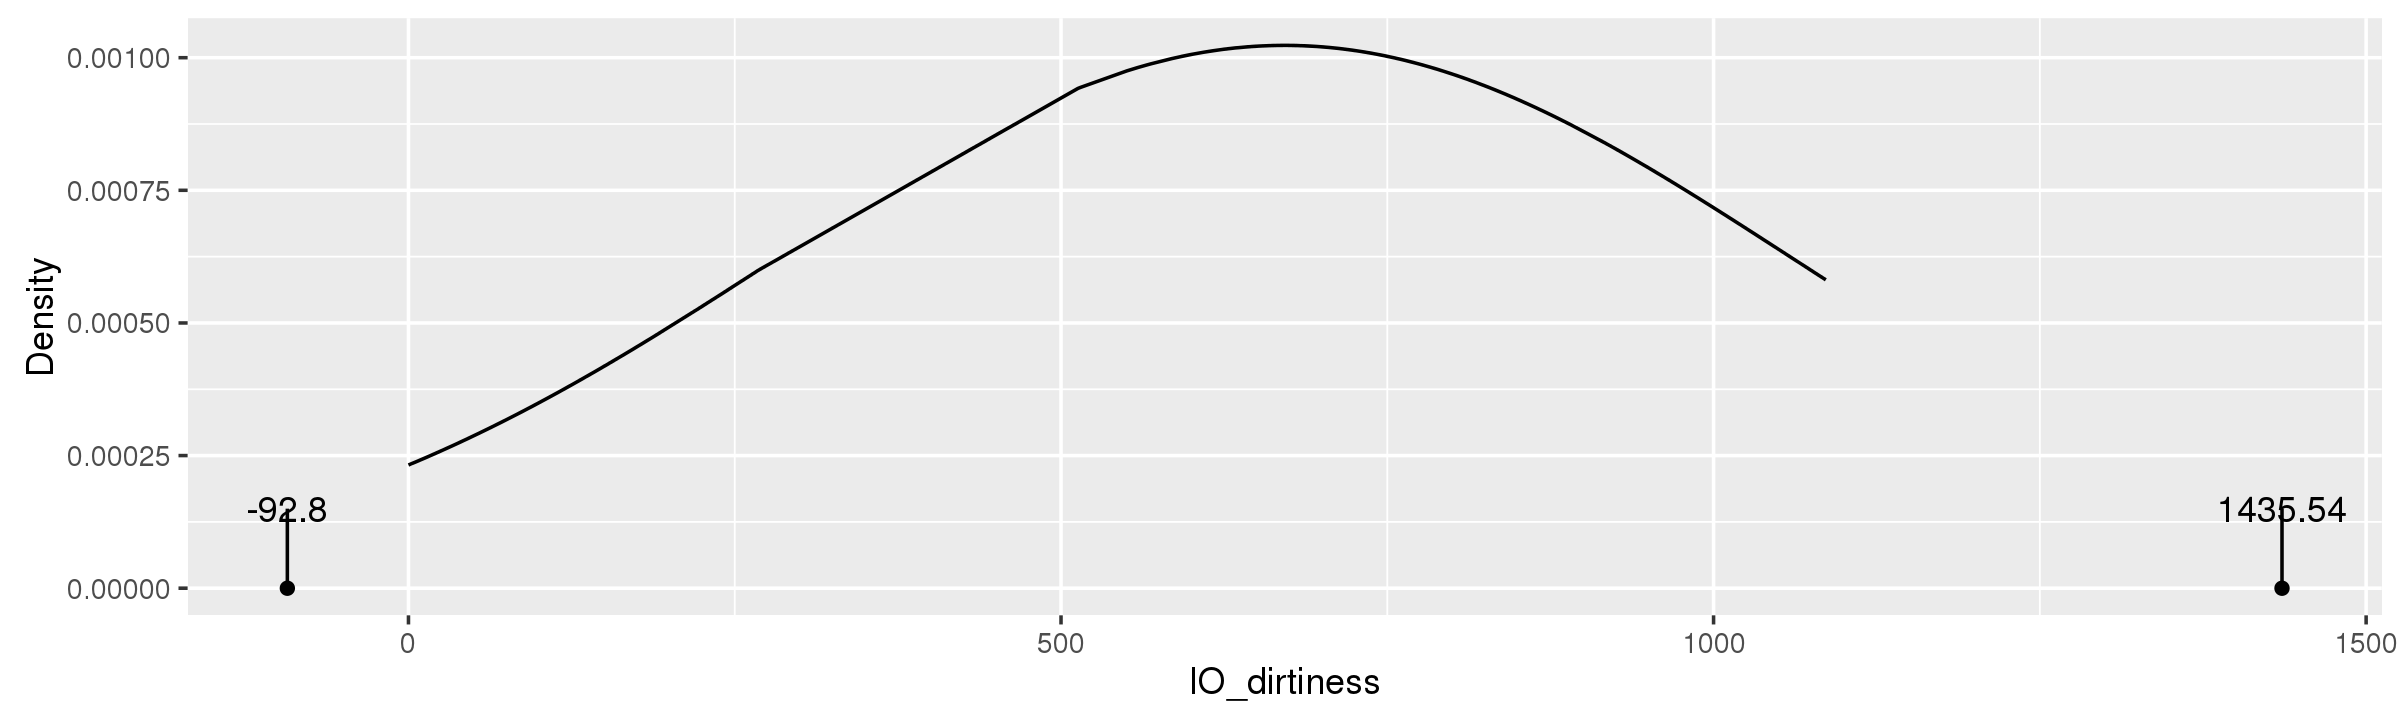

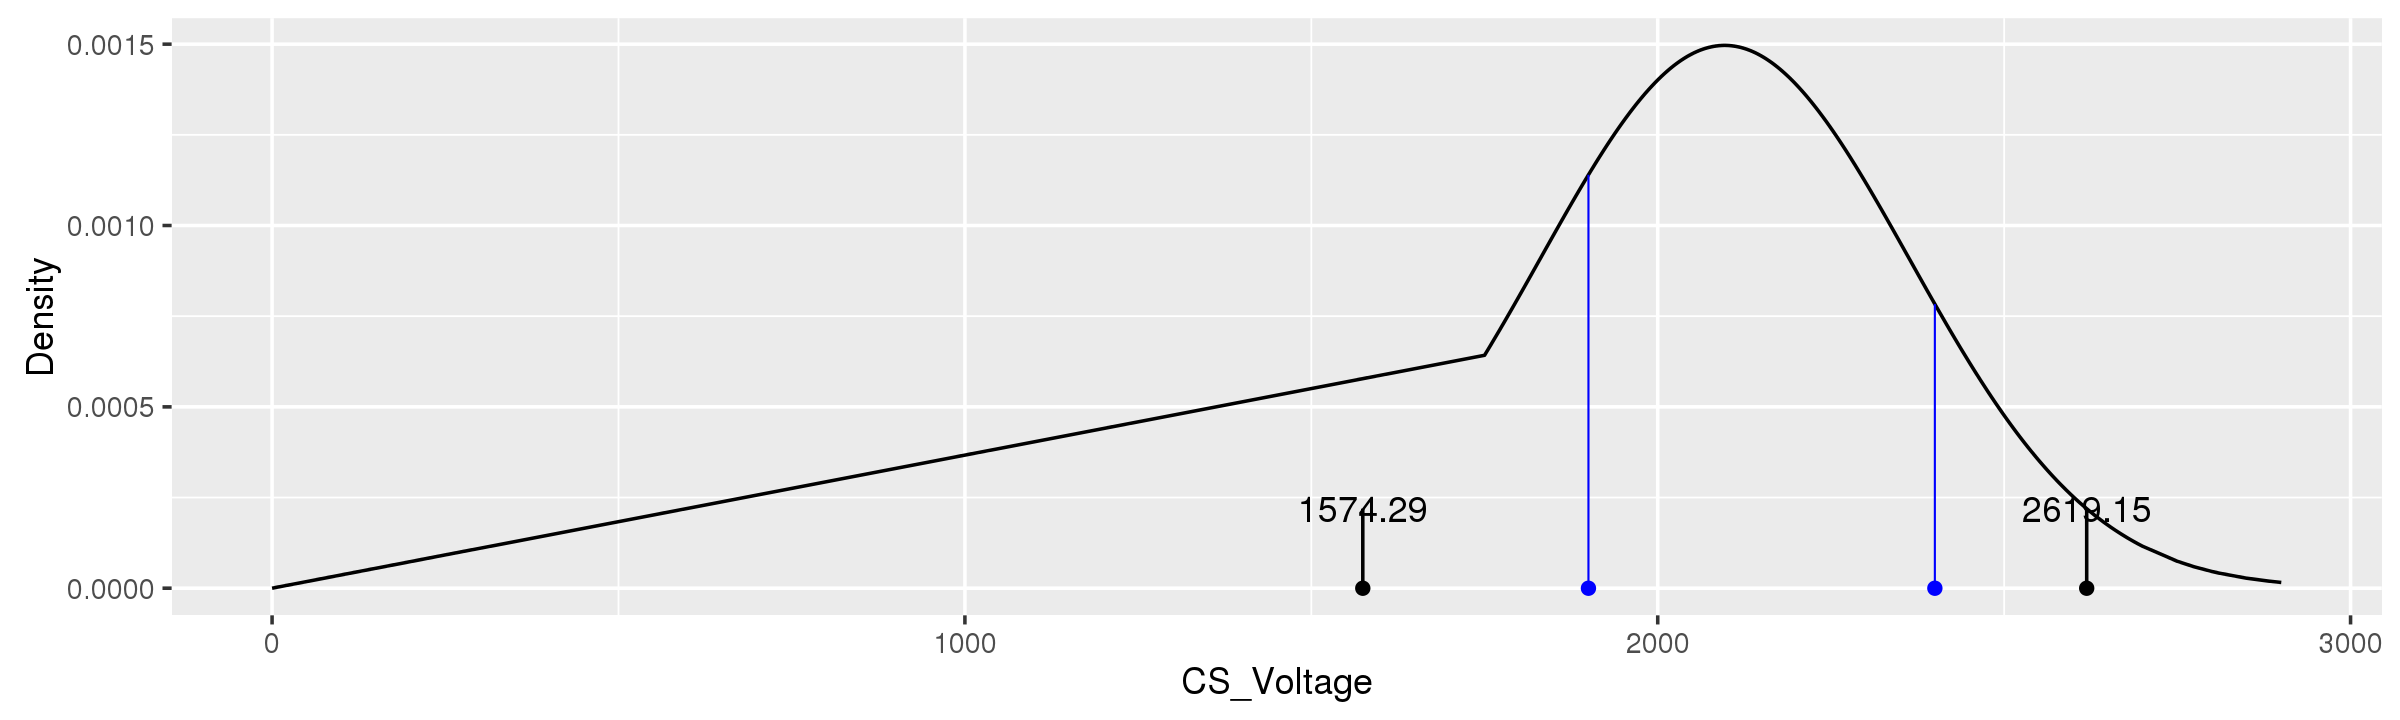

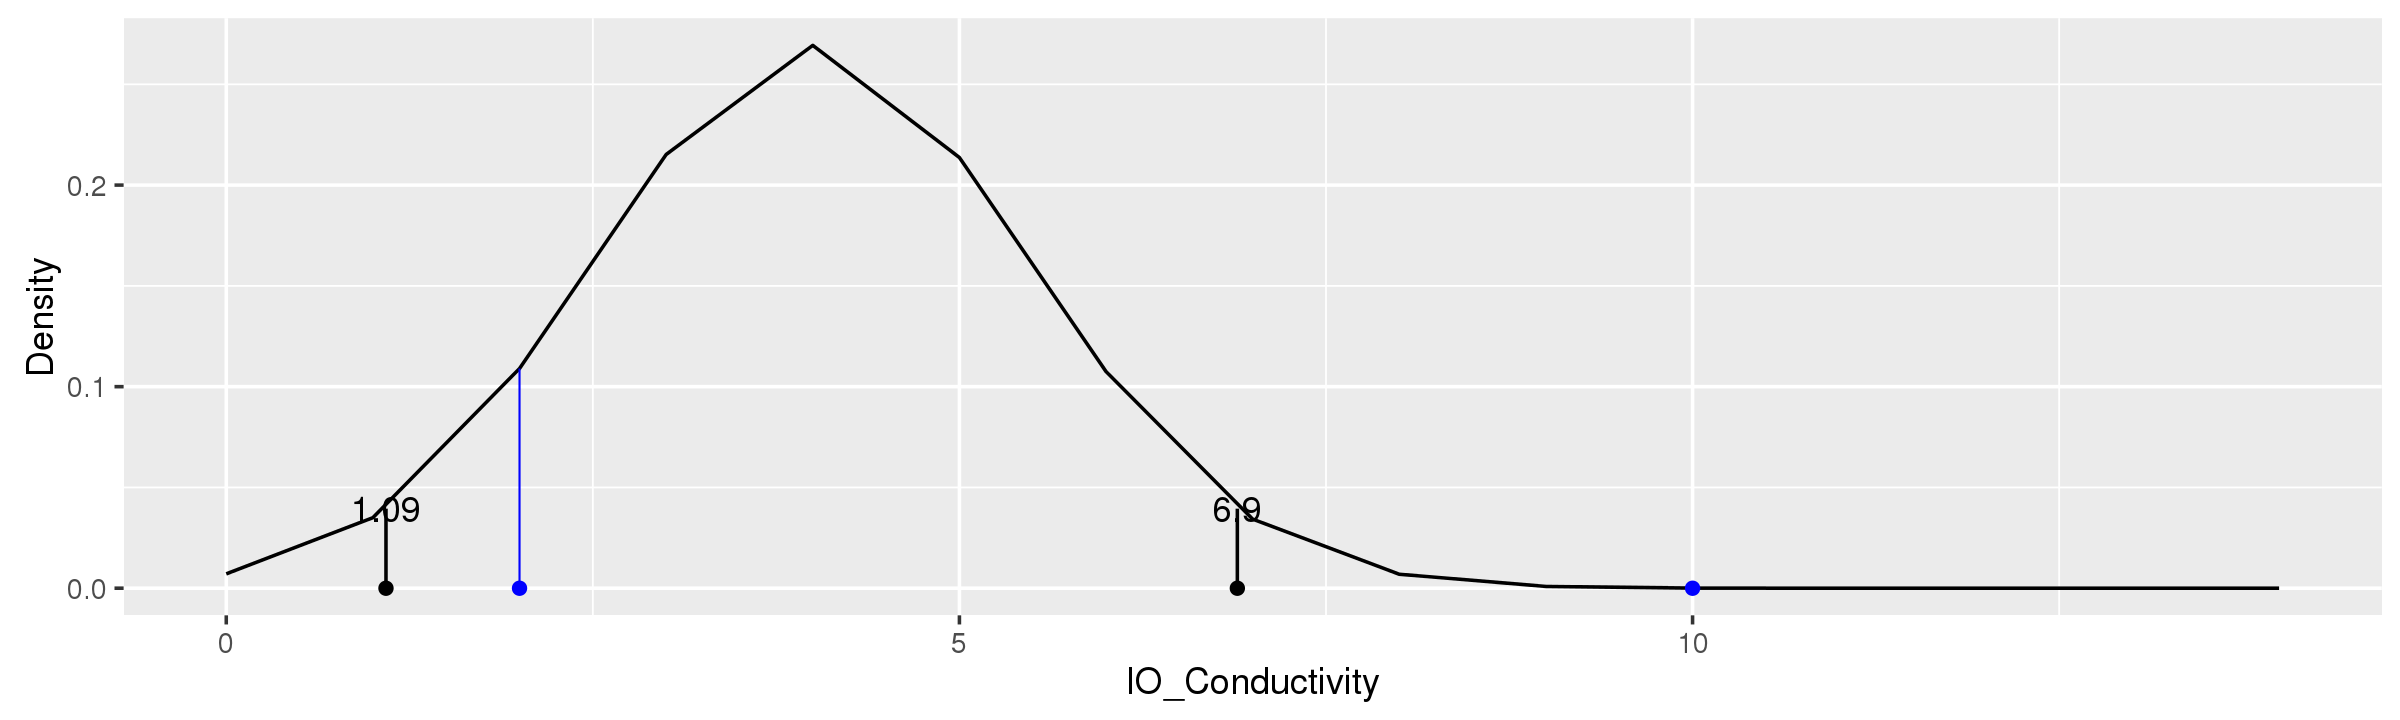

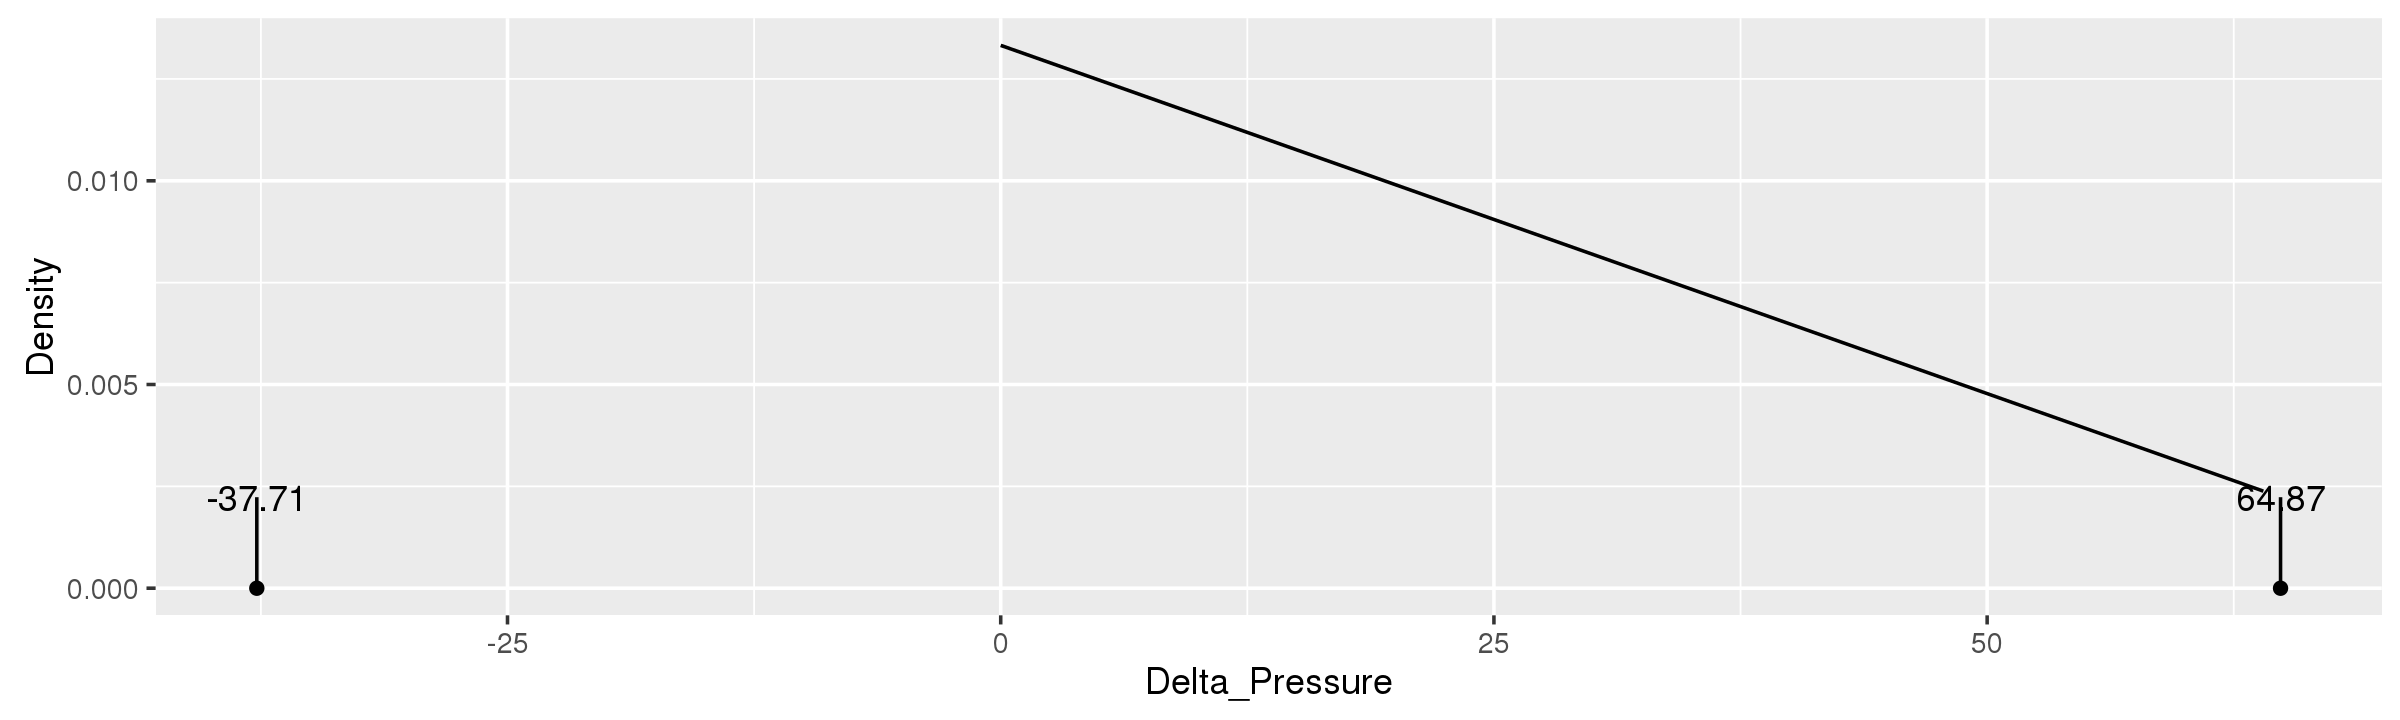

In [8]:
options(repr.plot.width=10, repr.plot.height = 3, repr.plot.res = 240)
temp %>% ggplot(aes(x = IO_dirtiness, y = IO_dirtiness.density)) +
         geom_line() + 
         ylab("Density") +
         geom_segment(data = summ, aes(x = IO_dirtiness.lower.Calculated, y = 0, xend = IO_dirtiness.lower.Calculated, yend = IO_dirtiness.lower.density)) +
         geom_segment(data = summ, aes(x = IO_dirtiness.upper.Calculated, y = 0, xend = IO_dirtiness.upper.Calculated, yend = IO_dirtiness.upper.density)) +
         geom_point(data = summ, aes(x = IO_dirtiness.lower.Calculated, y = 0)) +
         geom_point(data = summ, aes(x = IO_dirtiness.upper.Calculated, y = 0)) +
         geom_text(data = summ, aes(x = IO_dirtiness.lower.Calculated, y =IO_dirtiness.lower.density, label = round(IO_dirtiness.lower.Calculated,2))) +
         geom_text(data = summ, aes(x = IO_dirtiness.upper.Calculated, y =IO_dirtiness.upper.density, label = round(IO_dirtiness.upper.Calculated,2)))

temp %>% select(starts_with("CS_Voltage")) %>% 
         na.omit() %>% 
         ggplot(aes(x = CS_Voltage, y = CS_Voltage.density)) +
         geom_line() +
         ylab("Density") +
         geom_segment(data = summ, aes(x = CS_Voltage.lower.Calculated, y = 0, xend = CS_Voltage.lower.Calculated, yend = CS_Voltage.lower.density)) +
         geom_segment(data = summ, aes(x = CS_Voltage.upper.Calculated, y = 0, xend = CS_Voltage.upper.Calculated, yend = CS_Voltage.upper.density)) +
         geom_point(data = summ, aes(x = CS_Voltage.lower.Calculated, y = 0)) +
         geom_point(data = summ, aes(x = CS_Voltage.upper.Calculated, y = 0)) +
         geom_text(data = summ, aes(x = CS_Voltage.lower.Calculated, y =CS_Voltage.lower.density, label = round(CS_Voltage.lower.Calculated,2))) +
         geom_text(data = summ, aes(x = CS_Voltage.upper.Calculated, y =CS_Voltage.upper.density, label = round(CS_Voltage.upper.Calculated,2))) +
         geom_segment(data = summ, aes(x = 1900, y = 0, xend = 1900, yend = CS_Voltage.lower.Suggested_density), col = "blue", size = 0.3) +
         geom_segment(data = summ, aes(x = 2400, y = 0, xend = 2400, yend = CS_Voltage.upper.Suggested_density), col = "blue", size = 0.3) + 
         geom_point(data = summ, aes(x = 1900, y = 0), col = "blue") +
         geom_point(data = summ, aes(x = 2400, y = 0), col = "blue")

temp %>% select(starts_with("IO_Conductivity")) %>% 
         na.omit() %>% 
         ggplot(aes(x = IO_Conductivity, y = IO_Conductivity.density)) +
         geom_line()  +
         ylab("Density") +
         geom_segment(data = summ, aes(x = IO_Conductivity.lower.Calculated, y = 0, xend = IO_Conductivity.lower.Calculated, yend = IO_Conductivity.lower.density)) +
         geom_segment(data = summ, aes(x = IO_Conductivity.upper.Calculated, y = 0, xend = IO_Conductivity.upper.Calculated, yend = IO_Conductivity.upper.density)) +
         geom_point(data = summ, aes(x = IO_Conductivity.lower.Calculated, y = 0)) +
         geom_point(data = summ, aes(x = IO_Conductivity.upper.Calculated, y = 0)) +
         geom_text(data = summ, aes(x = IO_Conductivity.lower.Calculated, y =IO_Conductivity.lower.density, label = round(IO_Conductivity.lower.Calculated,2))) +
         geom_text(data = summ, aes(x = IO_Conductivity.upper.Calculated, y =IO_Conductivity.upper.density, label = round(IO_Conductivity.upper.Calculated,2))) +
         geom_segment(data = summ, aes(x = 2, y = 0, xend = 2, yend = IO_Conductivity.lower.Suggested_density), col = "blue", size = 0.3) +
         geom_segment(data = summ, aes(x = 10, y = 0, xend = 10, yend = IO_Conductivity.upper.Suggested_density), col = "blue", size = 0.3) +
         geom_point(data = summ, aes(x = 2, y = 0), col = "blue") +
         geom_point(data = summ, aes(x = 10, y = 0), col = "blue")

temp %>% select(starts_with("Delta_Pressure")) %>% 
         na.omit() %>% 
         ggplot(aes(x = Delta_Pressure, y = Delta_Pressure.density)) +
         geom_line() +
         ylab("Density") +
         geom_segment(data = summ, aes(x = Delta_Pressure.lower.Calculated, y = 0, xend = Delta_Pressure.lower.Calculated, yend = Delta_Pressure.lower.density)) +
         geom_segment(data = summ, aes(x = Delta_Pressure.upper.Calculated, y = 0, xend = Delta_Pressure.upper.Calculated, yend = Delta_Pressure.upper.density)) +
         geom_point(data = summ, aes(x = Delta_Pressure.lower.Calculated, y = 0)) +
         geom_point(data = summ, aes(x = Delta_Pressure.upper.Calculated, y = 0)) +
         geom_text(data = summ, aes(x = Delta_Pressure.lower.Calculated, y =Delta_Pressure.lower.density, label = round(Delta_Pressure.lower.Calculated,2))) +
         geom_text(data = summ, aes(x = Delta_Pressure.upper.Calculated, y =Delta_Pressure.upper.density, label = round(Delta_Pressure.upper.Calculated,2)))


On the other hand, the rest of the data is not that good. 

In [9]:
summ_pl <- data_ps %>% 
  group_by(Product_Line) %>%
  summarise_each(funs = funs(mean(., na.rm = T), sd(., na.rm = T), n()), 
                 PIP_Temperature, IO_temperature, vessel_flow, IO_dirtiness, CS_Voltage, IO_Conductivity, Delta_Pressure) %>%
  mutate(PIP_Temperature.lower.Calculated = qnorm(0.025, PIP_Temperature_mean, PIP_Temperature_sd, lower.tail = T),
         PIP_Temperature.upper.Calculated = qnorm(0.025, PIP_Temperature_mean, PIP_Temperature_sd, lower.tail = F),
         PIP_Temperature.lower.density = dnorm(PIP_Temperature.lower.Calculated, PIP_Temperature_mean, PIP_Temperature_sd),
         PIP_Temperature.upper.density = dnorm(PIP_Temperature.upper.Calculated, PIP_Temperature_mean, PIP_Temperature_sd), 
         PIP_Temperature.lower.Suggested = 250,
         PIP_Temperature.upper.Suggested = 350,               
         PIP_Temperature.lower.Suggested_density = dnorm(PIP_Temperature.lower.Suggested, PIP_Temperature_mean, PIP_Temperature_sd),
         PIP_Temperature.upper.Suggested_density = dnorm(PIP_Temperature.upper.Suggested, PIP_Temperature_mean, PIP_Temperature_sd), 
         PIP_Temperature.lower.Difference = (PIP_Temperature.lower.Calculated - PIP_Temperature.lower.Suggested), 
         PIP_Temperature.upper.Difference = (PIP_Temperature.upper.Calculated - PIP_Temperature.upper.Suggested), 
         PIP_Temperature.lower.d_statistic = round((PIP_Temperature.lower.Difference / PIP_Temperature_sd), 2), 
         PIP_Temperature.upper.d_statistic = round((PIP_Temperature.upper.Difference / PIP_Temperature_sd), 2),
         PIP_Temperature.lower.Proportion = round((PIP_Temperature.lower.Difference / PIP_Temperature.lower.Calculated),2), 
         PIP_Temperature.upper.Proportion = round((PIP_Temperature.upper.Difference / PIP_Temperature.upper.Calculated),2),
         IO_temperature.lower.Calculated = qnorm(0.025, IO_temperature_mean, IO_temperature_sd, lower.tail = T),
         IO_temperature.upper.Calculated = qnorm(0.025, IO_temperature_mean, IO_temperature_sd, lower.tail = F),
         IO_temperature.lower.density = dnorm(IO_temperature.lower.Calculated, IO_temperature_mean, IO_temperature_sd),
         IO_temperature.upper.density = dnorm(IO_temperature.upper.Calculated, IO_temperature_mean, IO_temperature_sd), 
         IO_temperature.lower.Suggested = 250,
         IO_temperature.upper.Suggested = 350,               
         IO_temperature.lower.Suggested_density = dnorm(IO_temperature.lower.Suggested, IO_temperature_mean, IO_temperature_sd),
         IO_temperature.upper.Suggested_density = dnorm(IO_temperature.upper.Suggested, IO_temperature_mean, IO_temperature_sd), 
         IO_temperature.lower.Difference = (IO_temperature.lower.Calculated - IO_temperature.lower.Suggested), 
         IO_temperature.upper.Difference = (IO_temperature.upper.Calculated - IO_temperature.upper.Suggested),   
         IO_temperature.lower.d_statistic = round((IO_temperature.lower.Difference / IO_temperature_sd), 2), 
         IO_temperature.upper.d_statistic = round((IO_temperature.upper.Difference / IO_temperature_sd), 2),
         IO_temperature.lower.Proportion = round((IO_temperature.lower.Difference / IO_temperature.lower.Calculated),2), 
         IO_temperature.upper.Proportion = round((IO_temperature.upper.Difference / IO_temperature.upper.Calculated),2),
         vessel_flow.lower.Calculated = qnorm(0.025, vessel_flow_mean, vessel_flow_sd, lower.tail = T),
         vessel_flow.upper.Calculated = qnorm(0.025, vessel_flow_mean, vessel_flow_sd, lower.tail = F),
         vessel_flow.lower.density = dnorm(vessel_flow.lower.Calculated, vessel_flow_mean, vessel_flow_sd),
         vessel_flow.upper.density = dnorm(vessel_flow.upper.Calculated, vessel_flow_mean, vessel_flow_sd), 
         vessel_flow.lower.Suggested = 3800,
         vessel_flow.upper.Suggested = 4600,               
         vessel_flow.lower.Suggested_density = dnorm(vessel_flow.lower.Suggested, vessel_flow_mean, vessel_flow_sd),
         vessel_flow.upper.Suggested_density = dnorm(vessel_flow.upper.Suggested, vessel_flow_mean, vessel_flow_sd),   
         vessel_flow.lower.Difference = (vessel_flow.lower.Calculated - vessel_flow.lower.Suggested), 
         vessel_flow.upper.Difference = (vessel_flow.upper.Calculated - vessel_flow.upper.Suggested),   
         vessel_flow.lower.d_statistic = round((vessel_flow.lower.Difference / vessel_flow_sd), 2), 
         vessel_flow.upper.d_statistic = round((vessel_flow.upper.Difference / vessel_flow_sd), 2),
         vessel_flow.lower.Proportion = round((vessel_flow.lower.Difference / vessel_flow.lower.Calculated),2), 
         vessel_flow.upper.Proportion = round((vessel_flow.upper.Difference / vessel_flow.upper.Calculated),2),
         CS_Voltage.lower.Calculated = qnorm(0.025, CS_Voltage_mean, CS_Voltage_sd, lower.tail = T),
         CS_Voltage.upper.Calculated = qnorm(0.025, CS_Voltage_mean, CS_Voltage_sd, lower.tail = F),
         CS_Voltage.lower.density = dnorm(CS_Voltage.lower.Calculated, CS_Voltage_mean, CS_Voltage_sd),
         CS_Voltage.upper.density = dnorm(CS_Voltage.upper.Calculated, CS_Voltage_mean, CS_Voltage_sd), 
         CS_Voltage.lower.Suggested = 1900,
         CS_Voltage.upper.Suggested = 2400,               
         CS_Voltage.lower.Suggested_density = dnorm(CS_Voltage.lower.Suggested, CS_Voltage_mean, CS_Voltage_sd),
         CS_Voltage.upper.Suggested_density = dnorm(CS_Voltage.upper.Suggested, CS_Voltage_mean, CS_Voltage_sd),   
         CS_Voltage.lower.Difference = (CS_Voltage.lower.Calculated - CS_Voltage.lower.Suggested), 
         CS_Voltage.upper.Difference = (CS_Voltage.upper.Calculated - CS_Voltage.upper.Suggested),   
         CS_Voltage.lower.d_statistic = round((CS_Voltage.lower.Difference / CS_Voltage_sd), 2), 
         CS_Voltage.upper.d_statistic = round((CS_Voltage.upper.Difference / CS_Voltage_sd), 2),
         CS_Voltage.lower.Proportion = round((CS_Voltage.lower.Difference / CS_Voltage.lower.Calculated),2), 
         CS_Voltage.upper.Proportion = round((CS_Voltage.upper.Difference / CS_Voltage.upper.Calculated),2),
         IO_Conductivity.lower.Calculated = qnorm(0.025, IO_Conductivity_mean, IO_Conductivity_sd, lower.tail = T),
         IO_Conductivity.upper.Calculated = qnorm(0.025, IO_Conductivity_mean, IO_Conductivity_sd, lower.tail = F),
         IO_Conductivity.lower.density = dnorm(IO_Conductivity.lower.Calculated, IO_Conductivity_mean, IO_Conductivity_sd),
         IO_Conductivity.upper.density = dnorm(IO_Conductivity.upper.Calculated, IO_Conductivity_mean, IO_Conductivity_sd),
         IO_Conductivity.lower.Suggested = 2,
         IO_Conductivity.upper.Suggested = 10,               
         IO_Conductivity.lower.Suggested_density = dnorm(IO_Conductivity.lower.Suggested, IO_Conductivity_mean, IO_Conductivity_sd),
         IO_Conductivity.upper.Suggested_density = dnorm(IO_Conductivity.upper.Suggested, IO_Conductivity_mean, IO_Conductivity_sd), 
         IO_Conductivity.lower.Difference = (IO_Conductivity.lower.Calculated - IO_Conductivity.lower.Suggested), 
         IO_Conductivity.upper.Difference = (IO_Conductivity.upper.Calculated - IO_Conductivity.upper.Suggested),   
         IO_Conductivity.lower.d_statistic = round((IO_Conductivity.lower.Difference / IO_Conductivity_sd), 2), 
         IO_Conductivity.upper.d_statistic = round((IO_Conductivity.upper.Difference / IO_Conductivity_sd), 2),
         IO_Conductivity.lower.Proportion = round((IO_Conductivity.lower.Difference / IO_Conductivity.lower.Calculated),2), 
         IO_Conductivity.upper.Proportion = round((IO_Conductivity.upper.Difference / IO_Conductivity.upper.Calculated),2),
         IO_dirtiness.lower.Calculated = qnorm(0.025, IO_dirtiness_mean, IO_dirtiness_sd, lower.tail = T),
         IO_dirtiness.upper.Calculated = qnorm(0.025, IO_dirtiness_mean, IO_dirtiness_sd, lower.tail = F),
         IO_dirtiness.lower.density = dnorm(IO_dirtiness.lower.Calculated, IO_dirtiness_mean, IO_dirtiness_sd),
         IO_dirtiness.upper.density = dnorm(IO_dirtiness.upper.Calculated, IO_dirtiness_mean, IO_dirtiness_sd),
         Delta_Pressure.lower.Calculated = qnorm(0.025, Delta_Pressure_mean, Delta_Pressure_sd, lower.tail = T),
         Delta_Pressure.upper.Calculated = qnorm(0.025, Delta_Pressure_mean, Delta_Pressure_sd, lower.tail = F),
         Delta_Pressure.lower.density = dnorm(Delta_Pressure.lower.Calculated, Delta_Pressure_mean, Delta_Pressure_sd),
         Delta_Pressure.upper.density = dnorm(Delta_Pressure.upper.Calculated, Delta_Pressure_mean, Delta_Pressure_sd))

summ_pl %>% gather(key = Feature, value = Value, -Product_Line) %>%
  mutate(Feature = gsub("_mean", ".NA.mean", Feature),
         Feature = gsub("_sd", ".NA.sd", Feature),
         Feature = gsub("_n", ".NA.n", Feature)) %>%
  separate(Feature, c("Feature", "Threshold", "Metric"), sep = "[.]") %>%
  filter(Threshold != "NA") %>%
  spread(key = Metric, value = Value) %>%
  select(Product_Line, Feature, Threshold, Calculated, Suggested, Difference, Proportion, d_statistic)


,Product_Line,Feature,Threshold,Calculated,Suggested,Difference,Proportion,d_statistic
1,HP Indigo 7000,CS_Voltage,lower,1558.80852087336,1900,-341.191479126642,-0.22,-1.12
2,HP Indigo 7000,CS_Voltage,upper,2748.77298571872,2400,348.772985718723,0.13,1.15
3,HP Indigo 7000,Delta_Pressure,lower,-32.1259864019999,NA,NA,NA,NA
4,HP Indigo 7000,Delta_Pressure,upper,46.0921068582075,NA,NA,NA,NA
5,HP Indigo 7000,IO_Conductivity,lower,NA,2,NA,NA,NA
6,HP Indigo 7000,IO_Conductivity,upper,NA,10,NA,NA,NA
7,HP Indigo 7000,IO_dirtiness,lower,-415.028952327116,NA,NA,NA,NA
8,HP Indigo 7000,IO_dirtiness,upper,1276.80590870276,NA,NA,NA,NA
9,HP Indigo 7000,IO_temperature,lower,205.967637496755,250,-44.0323625032447,-0.21,-1.07
10,HP Indigo 7000,IO_temperature,upper,367.859090577408,350,17.859090577408,0.05,0.43


Warning message:
: Removed 19908 rows containing non-finite values (stat_bin).

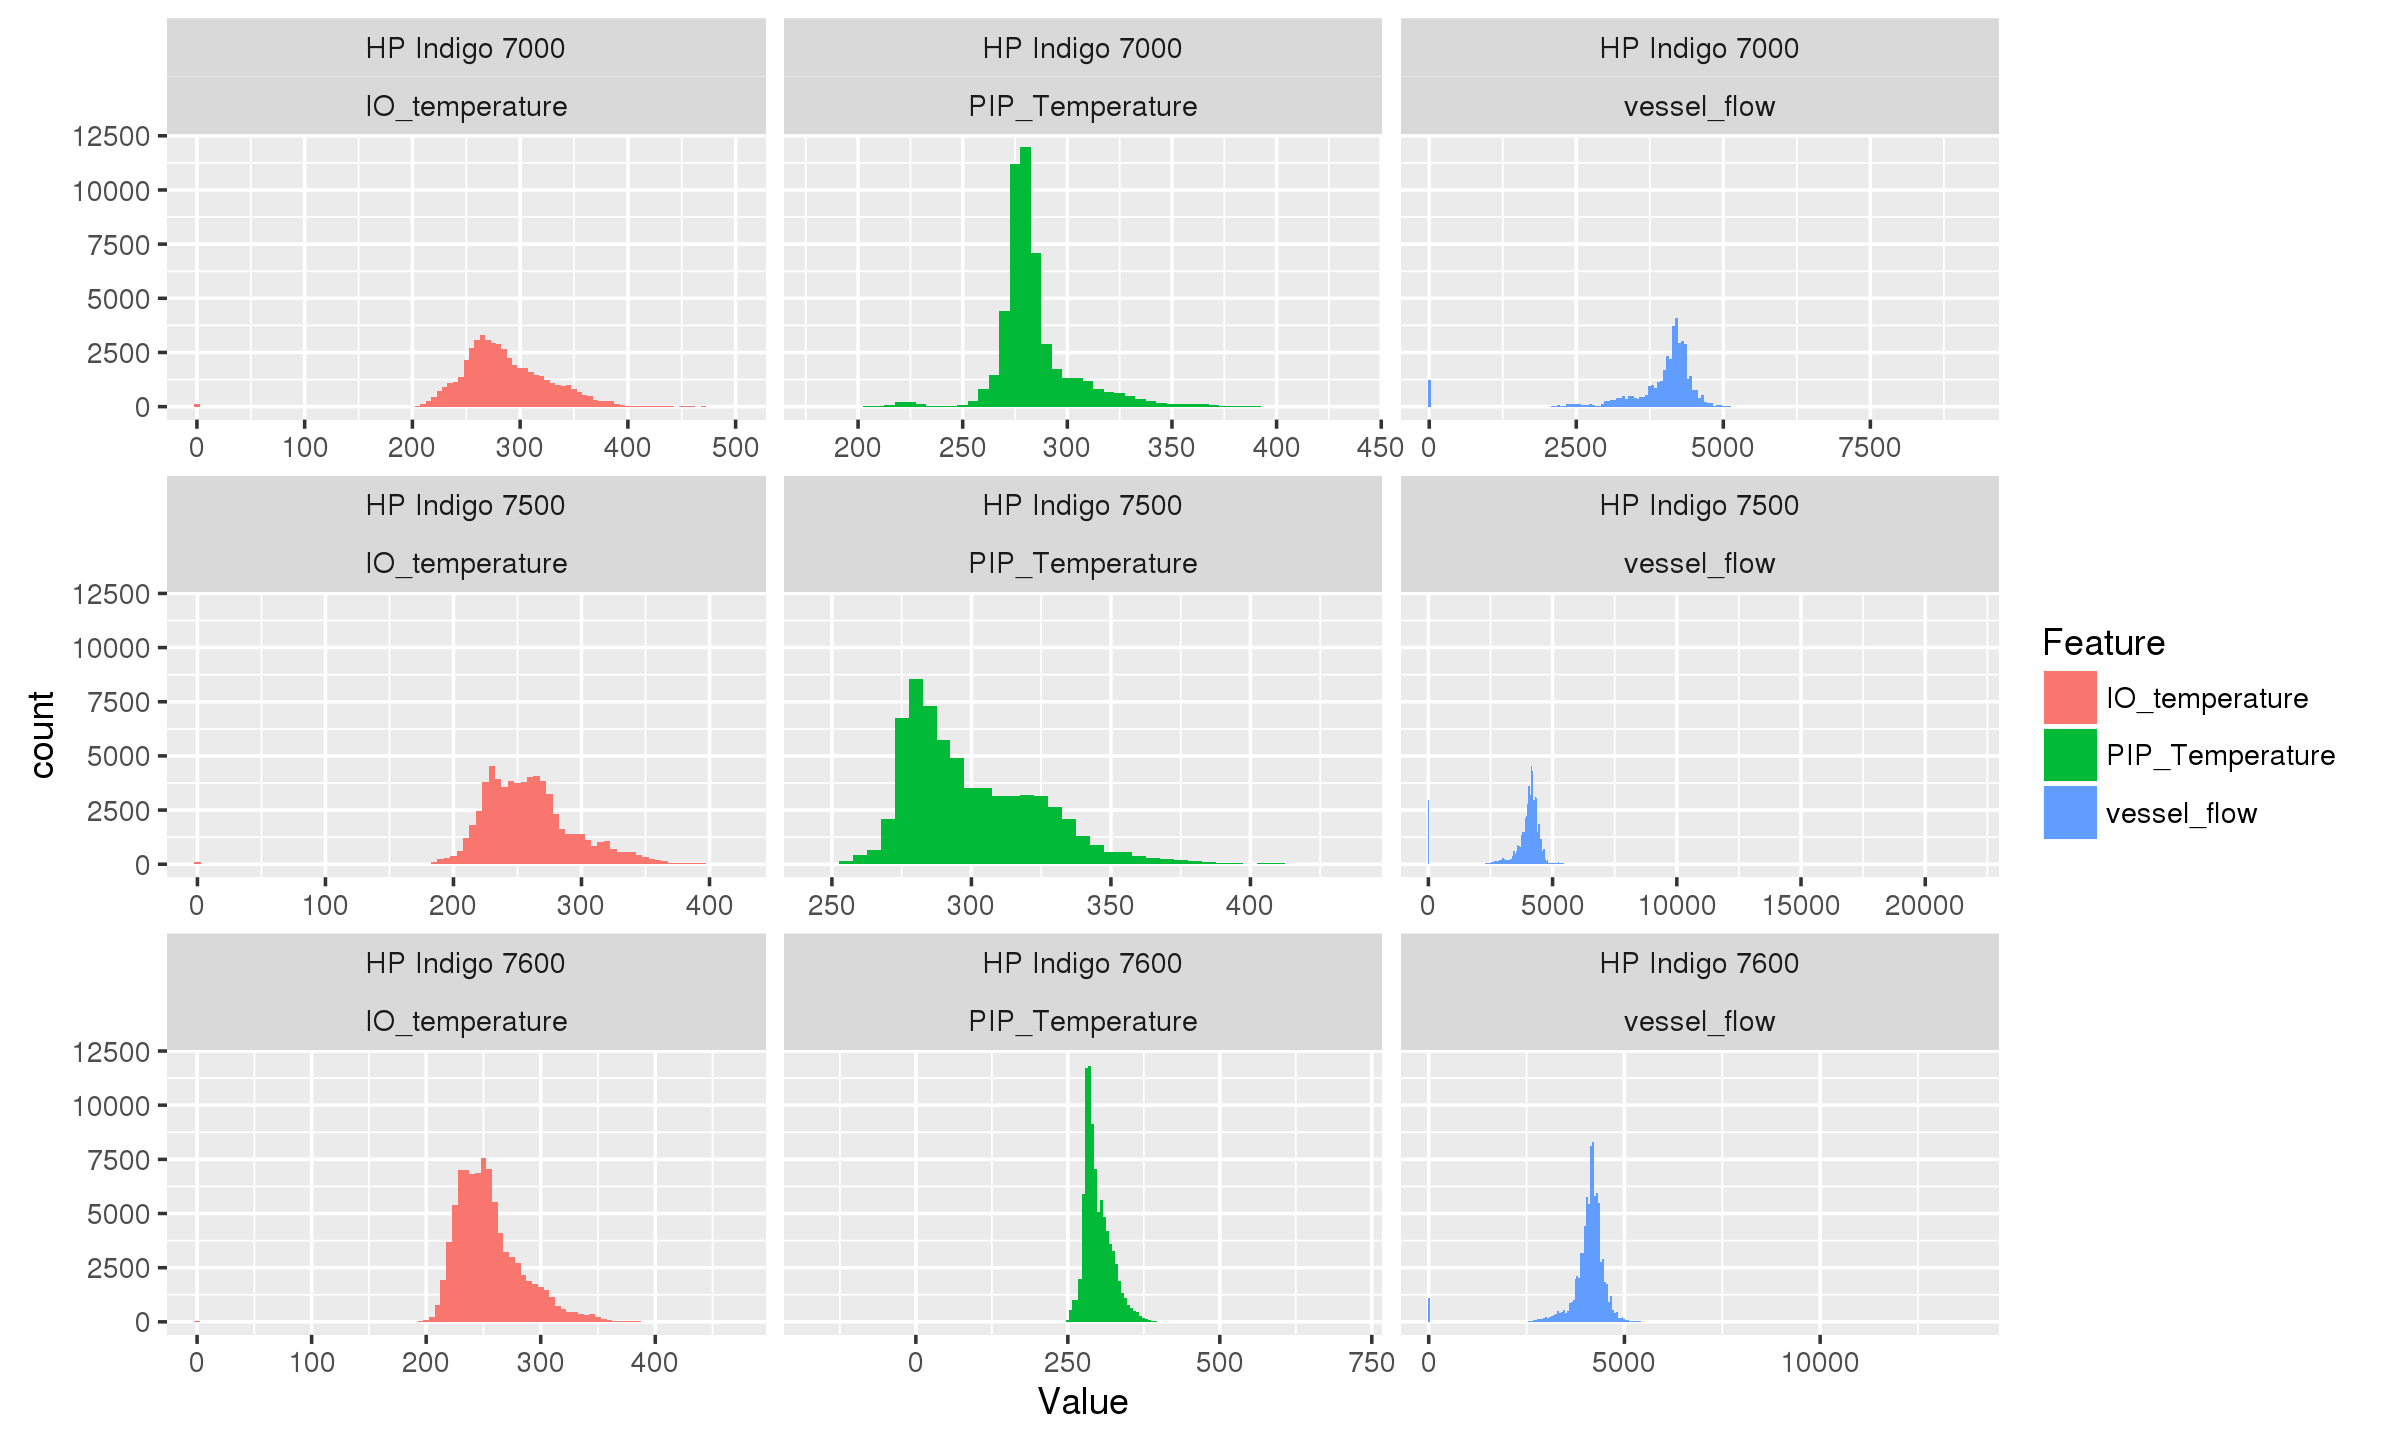

In [10]:
options(repr.plot.width=10, repr.plot.height = 6, repr.plot.res = 240)
hist_data <- temp %>% 
  select(Product_Line, PIP_Temperature, IO_temperature, vessel_flow) %>%
  gather(key = Feature, value = Value, PIP_Temperature, IO_temperature, vessel_flow)
hist_data %>%
  ggplot(aes(x = Value, fill = Feature)) +
  geom_histogram(data = hist_data %>% filter(Feature == "PIP_Temperature"), binwidth = 5) +
  geom_histogram(data = hist_data %>% filter(Feature == "IO_temperature"), binwidth = 5) +
  geom_histogram(data = hist_data %>% filter(Feature == "vessel_flow"), binwidth = 50) +
  facet_wrap( ~ Product_Line + Feature, scales = "free_x", nrow = 3)

rm(hist_data)

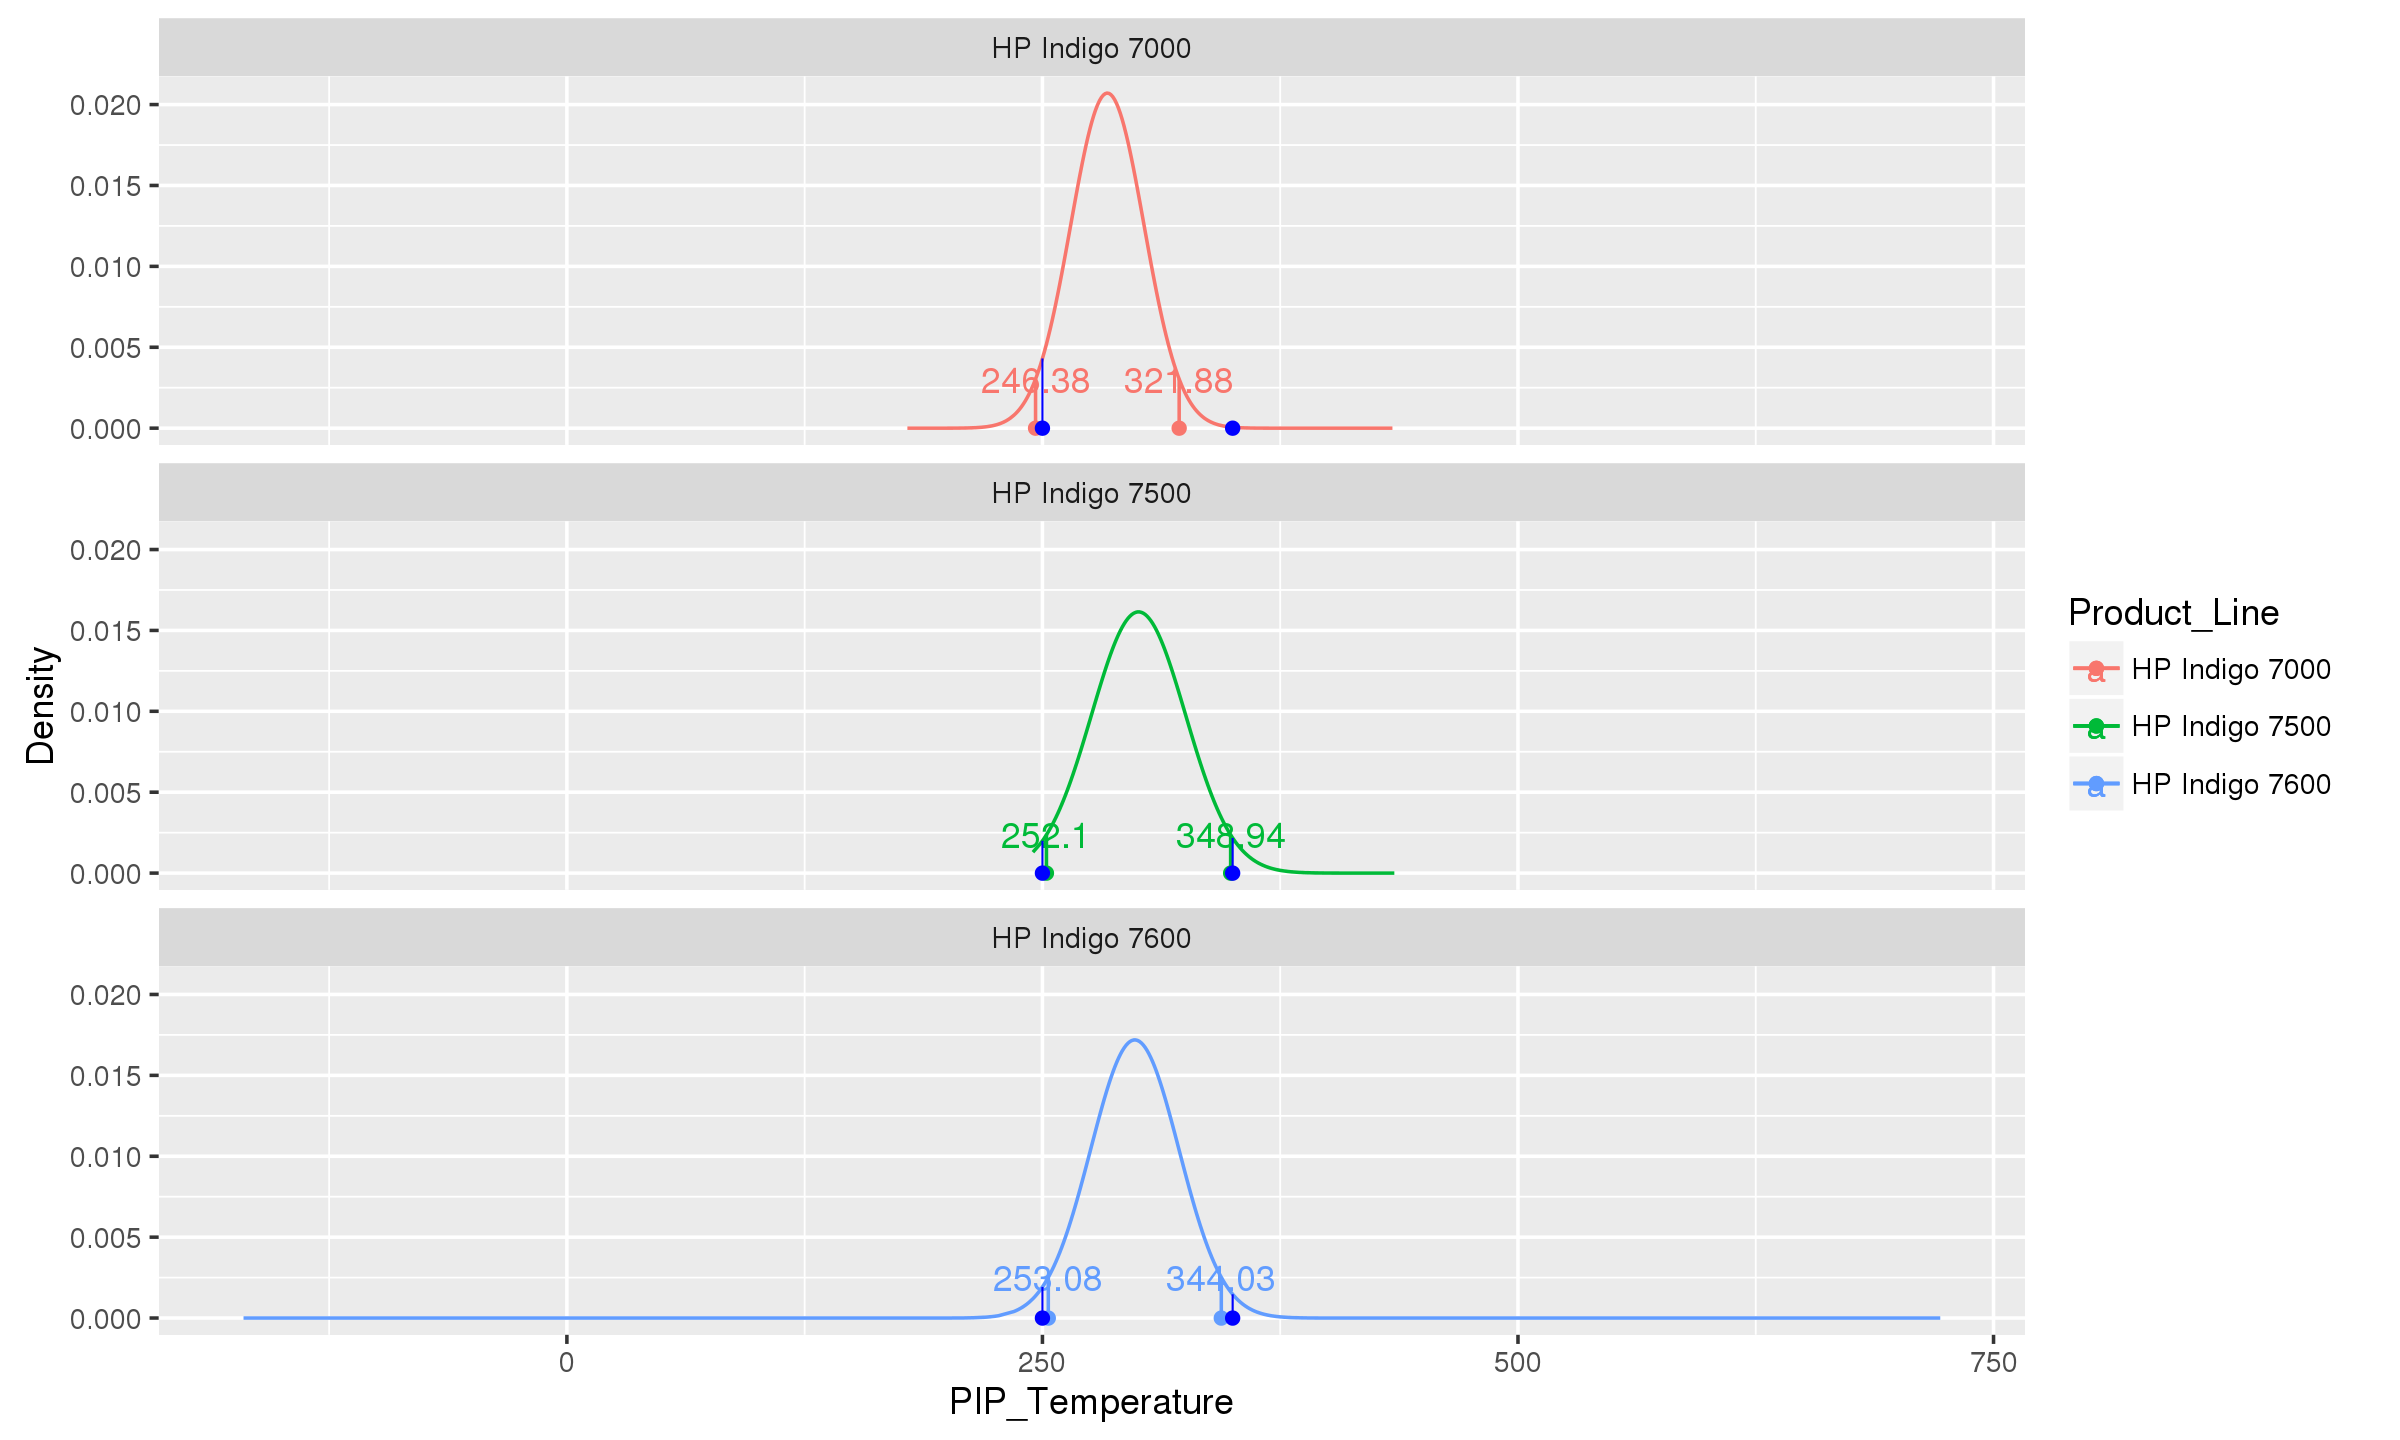

Warning message:
: Removed 19908 rows containing missing values (geom_path).

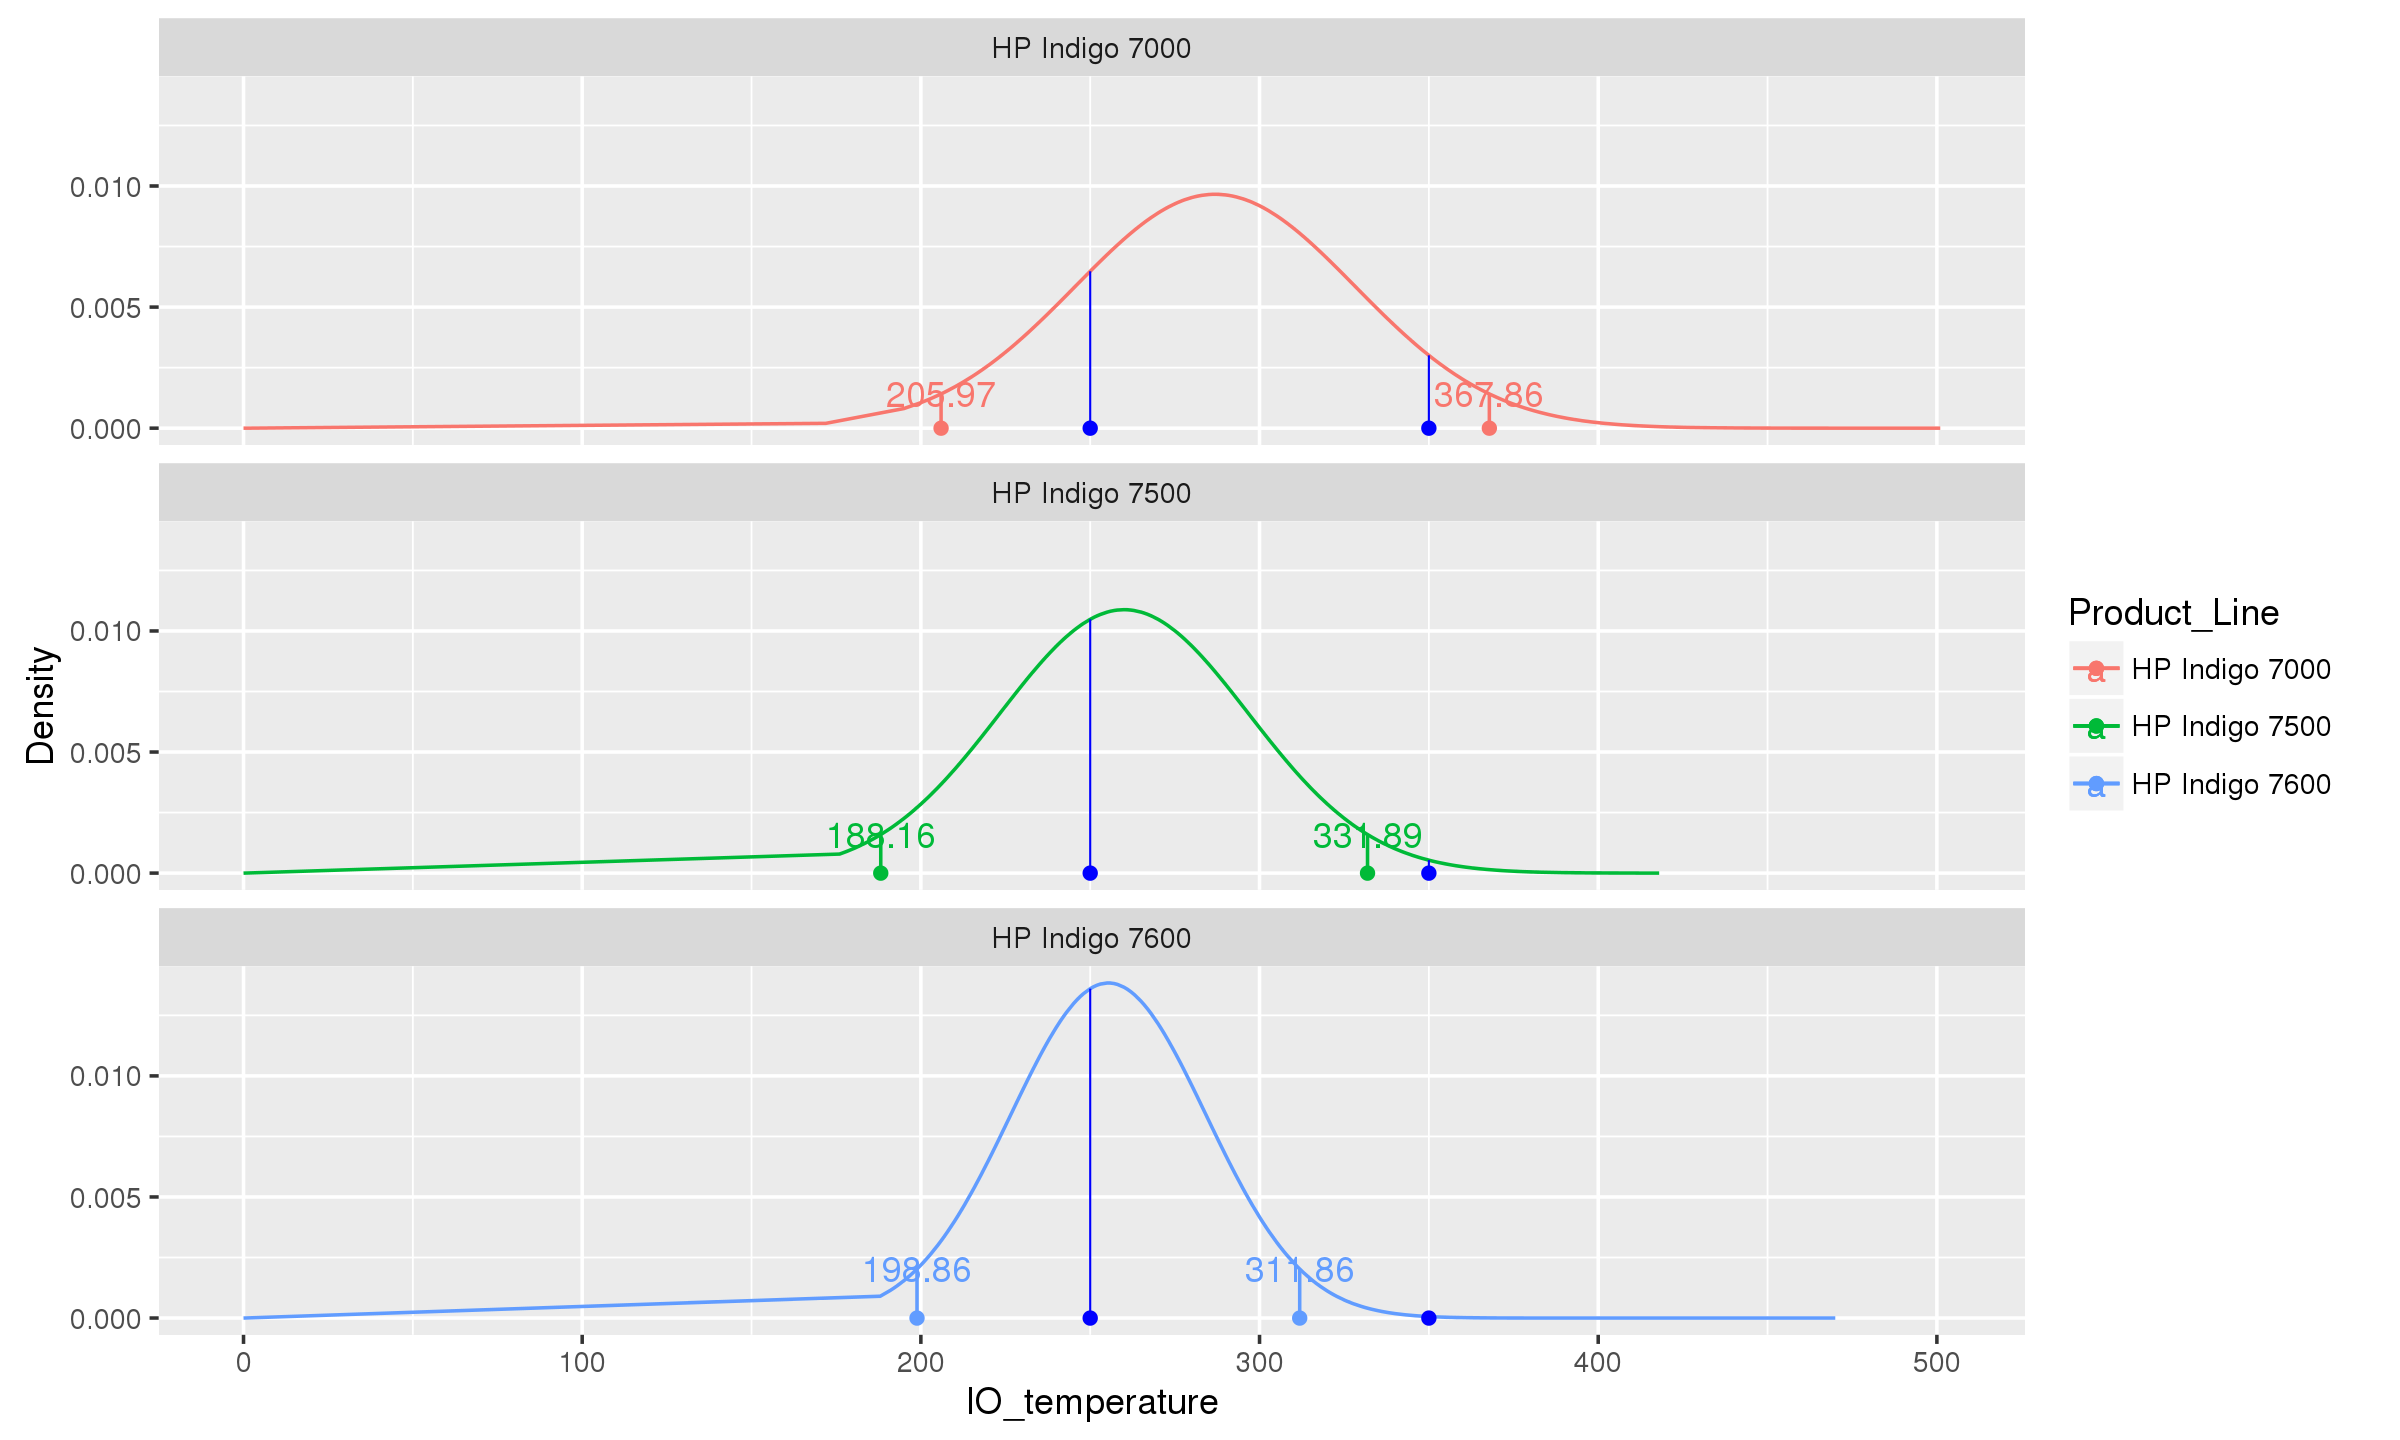

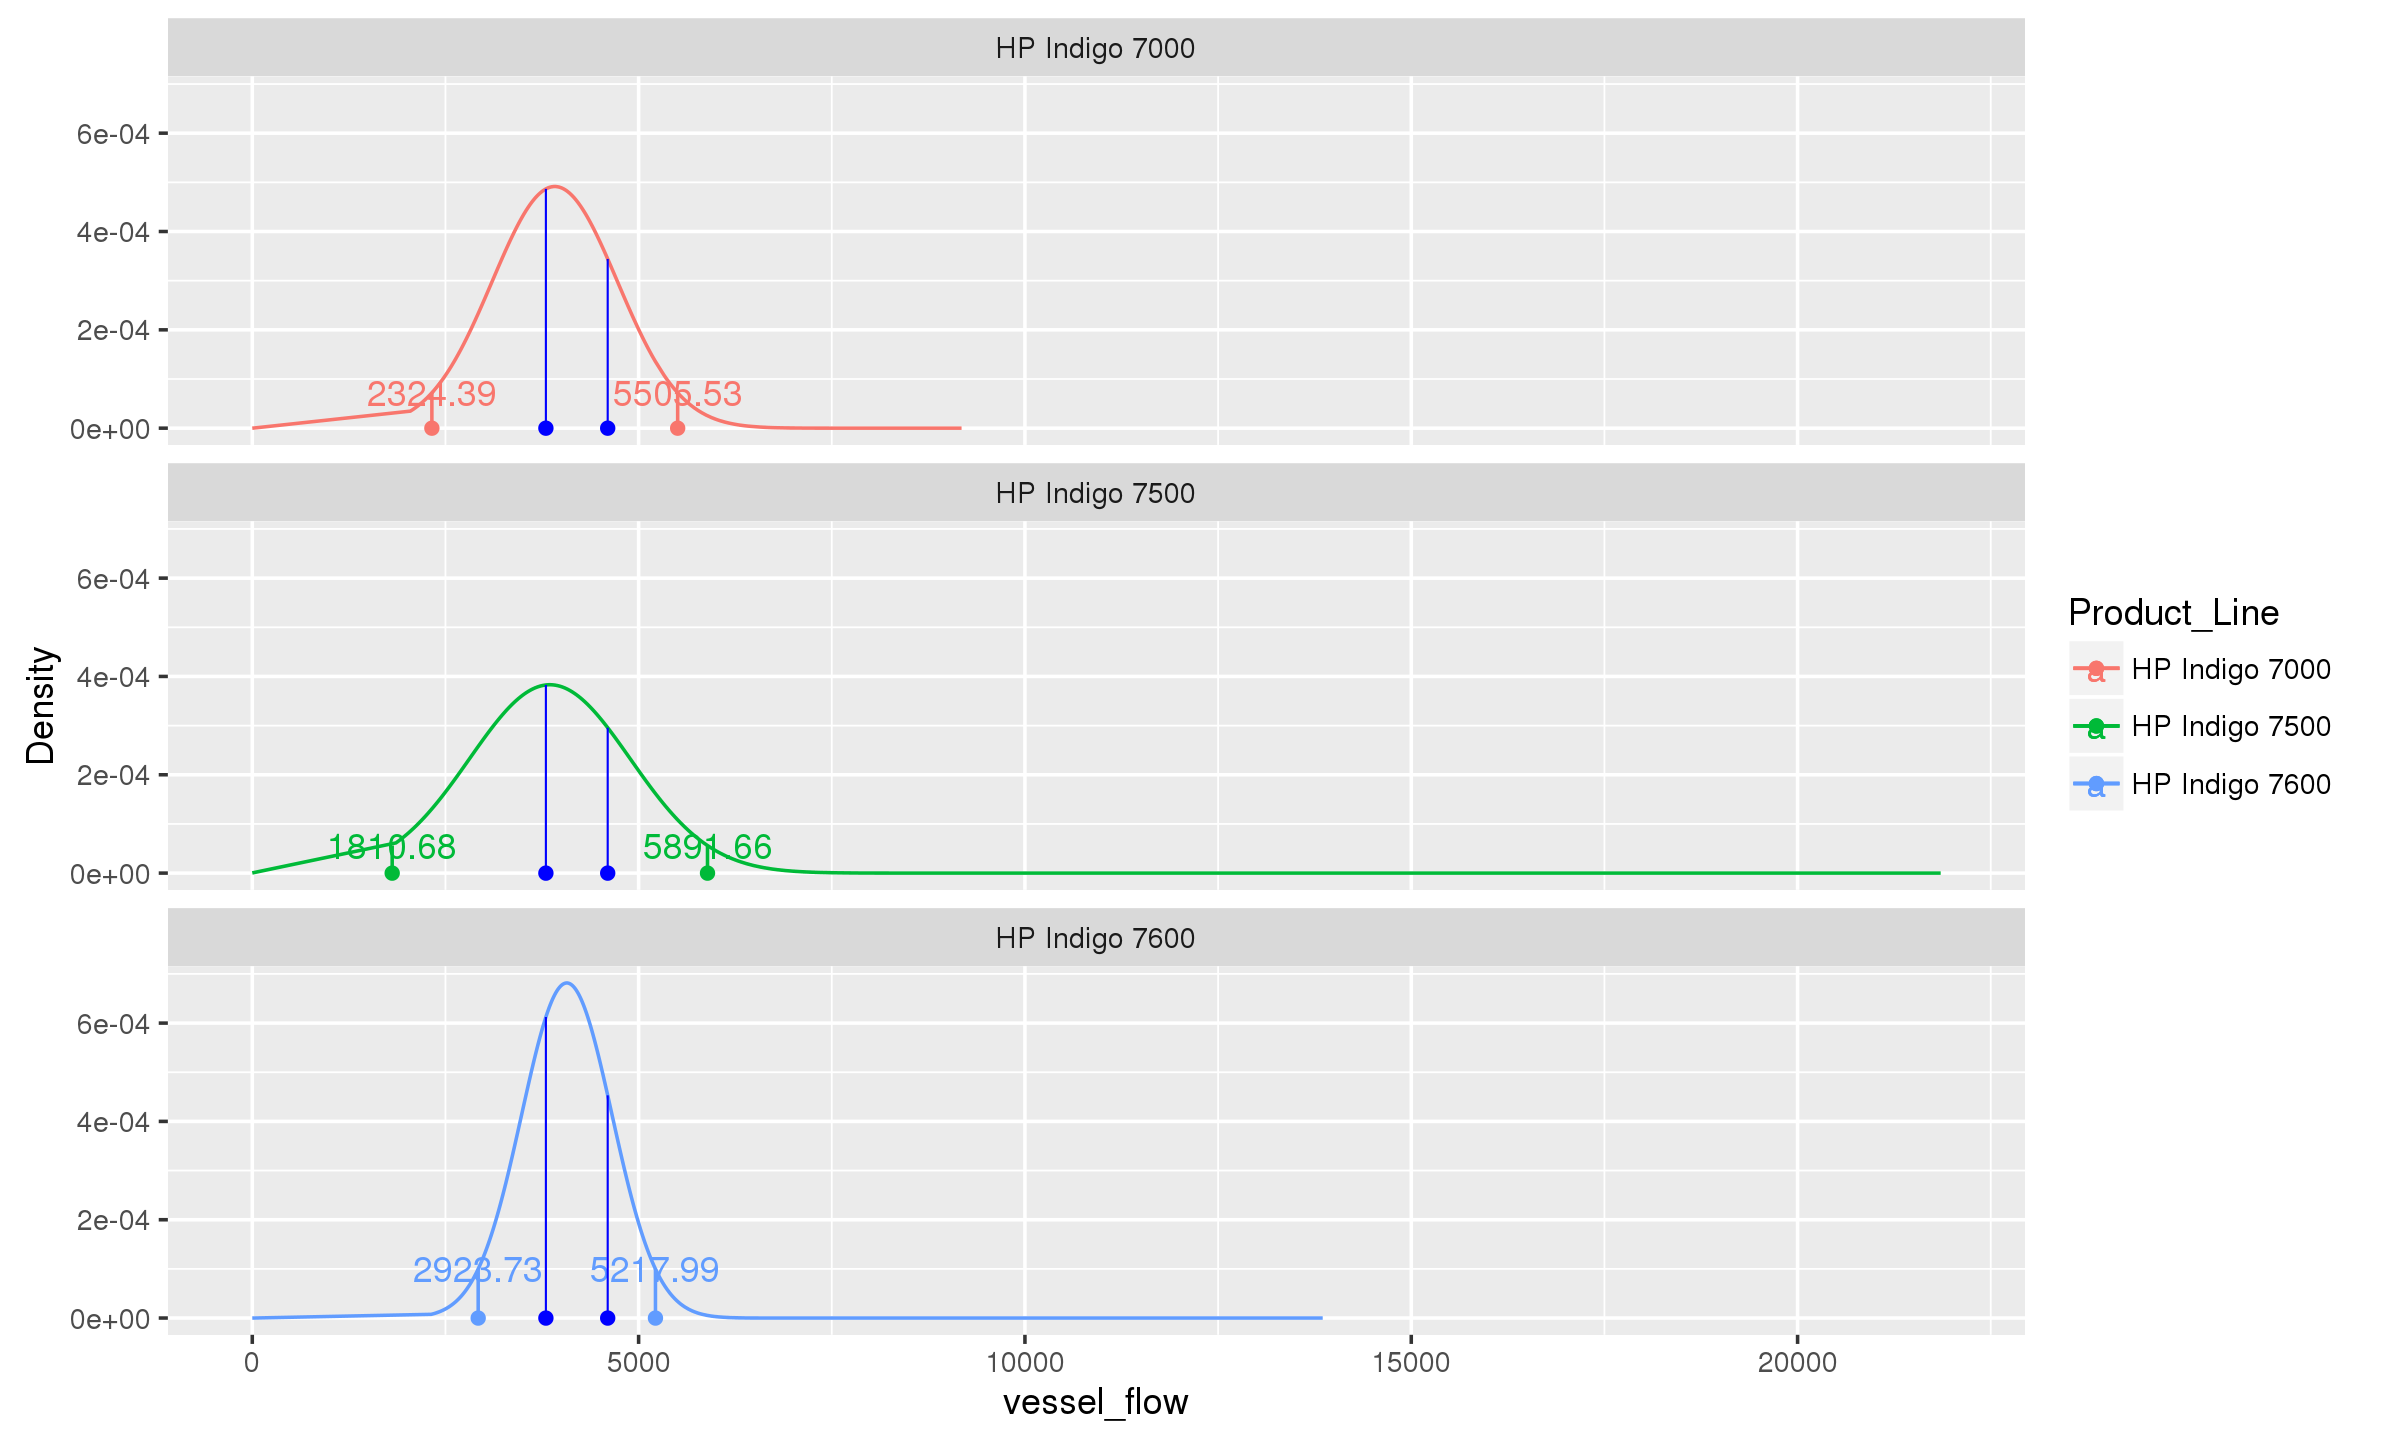

In [11]:
options(repr.plot.width=10, repr.plot.height = 6, repr.plot.res = 240)
 temp %>%  
     ggplot(aes(x = PIP_Temperature, y = PIP_Temperature.grouped_density, col = Product_Line)) +
     geom_line() +
     ylab("Density") +
     geom_segment(data = summ_pl, aes(x = PIP_Temperature.lower.Calculated, y = 0, xend = PIP_Temperature.lower.Calculated, yend = PIP_Temperature.lower.density)) +
     geom_segment(data = summ_pl, aes(x = PIP_Temperature.upper.Calculated, y = 0, xend = PIP_Temperature.upper.Calculated, yend = PIP_Temperature.upper.density)) +
     geom_point(data = summ_pl, aes(x = PIP_Temperature.lower.Calculated, y = 0)) +
     geom_point(data = summ_pl, aes(x = PIP_Temperature.upper.Calculated, y = 0)) +
     geom_text(data = summ_pl, aes(x = PIP_Temperature.lower.Calculated, y =PIP_Temperature.lower.density, label = round(PIP_Temperature.lower.Calculated,2))) +
     geom_text(data = summ_pl, aes(x = PIP_Temperature.upper.Calculated, y =PIP_Temperature.upper.density, label = round(PIP_Temperature.upper.Calculated,2))) + 
     geom_segment(data = summ_pl, aes(x = 250, y = 0, xend = 250, yend = PIP_Temperature.lower.Suggested_density), col = "blue", size = 0.3) +
     geom_segment(data = summ_pl, aes(x = 350, y = 0, xend = 350, yend = PIP_Temperature.upper.Suggested_density), col = "blue", size = 0.3) +
     geom_point(data = summ_pl, aes(x = 250, y = 0), col = "blue") +
     geom_point(data = summ_pl, aes(x = 350, y = 0), col = "blue") +
     facet_wrap(~ Product_Line, nrow = 3)
 temp %>%  
     ggplot(aes(x = IO_temperature, y = IO_temperature.grouped_density, col = Product_Line)) +
     geom_line() +
     ylab("Density") +
     geom_segment(data = summ_pl, aes(x = IO_temperature.lower.Calculated, y = 0, xend = IO_temperature.lower.Calculated, yend = IO_temperature.lower.density)) +
     geom_segment(data = summ_pl, aes(x = IO_temperature.upper.Calculated, y = 0, xend = IO_temperature.upper.Calculated, yend = IO_temperature.upper.density)) +
     geom_point(data = summ_pl, aes(x = IO_temperature.lower.Calculated, y = 0)) +
     geom_point(data = summ_pl, aes(x = IO_temperature.upper.Calculated, y = 0)) +
     geom_text(data = summ_pl, aes(x = IO_temperature.lower.Calculated, y =IO_temperature.lower.density, label = round(IO_temperature.lower.Calculated,2))) +
     geom_text(data = summ_pl, aes(x = IO_temperature.upper.Calculated, y =IO_temperature.upper.density, label = round(IO_temperature.upper.Calculated,2))) + 
     geom_segment(data = summ_pl, aes(x = 250, y = 0, xend = 250, yend = IO_temperature.lower.Suggested_density), col = "blue", size = 0.3) +
     geom_segment(data = summ_pl, aes(x = 350, y = 0, xend = 350, yend = IO_temperature.upper.Suggested_density), col = "blue", size = 0.3) + 
     geom_point(data = summ_pl, aes(x = 250, y = 0), col = "blue") +
     geom_point(data = summ_pl, aes(x = 350, y = 0), col = "blue") +
     facet_wrap(~ Product_Line, nrow = 3)
 temp %>%  
     ggplot(aes(x = vessel_flow, y = vessel_flow.grouped_density, col = Product_Line)) +
     geom_line() +
     ylab("Density") +
     geom_segment(data = summ_pl, aes(x = vessel_flow.lower.Calculated, y = 0, xend = vessel_flow.lower.Calculated, yend = vessel_flow.lower.density)) +
     geom_segment(data = summ_pl, aes(x = vessel_flow.upper.Calculated, y = 0, xend = vessel_flow.upper.Calculated, yend = vessel_flow.upper.density)) +
     geom_point(data = summ_pl, aes(x = vessel_flow.lower.Calculated, y = 0)) +
     geom_point(data = summ_pl, aes(x = vessel_flow.upper.Calculated, y = 0)) +
     geom_text(data = summ_pl, aes(x = vessel_flow.lower.Calculated, y =vessel_flow.lower.density, label = round(vessel_flow.lower.Calculated,2))) +
     geom_text(data = summ_pl, aes(x = vessel_flow.upper.Calculated, y =vessel_flow.upper.density, label = round(vessel_flow.upper.Calculated,2))) + 
     geom_segment(data = summ_pl, aes(x = 3800, y = 0, xend = 3800, yend = vessel_flow.lower.Suggested_density), col = "blue", size = 0.3) +
     geom_segment(data = summ_pl, aes(x = 4600, y = 0, xend = 4600, yend = vessel_flow.upper.Suggested_density), col = "blue", size = 0.3) +
     geom_point(data = summ_pl, aes(x = 3800, y = 0), col = "blue") +
     geom_point(data = summ_pl, aes(x = 4600, y = 0), col = "blue") +
     facet_wrap(~ Product_Line, nrow = 3)

Warning message:
: Removed 99027 rows containing non-finite values (stat_bin).

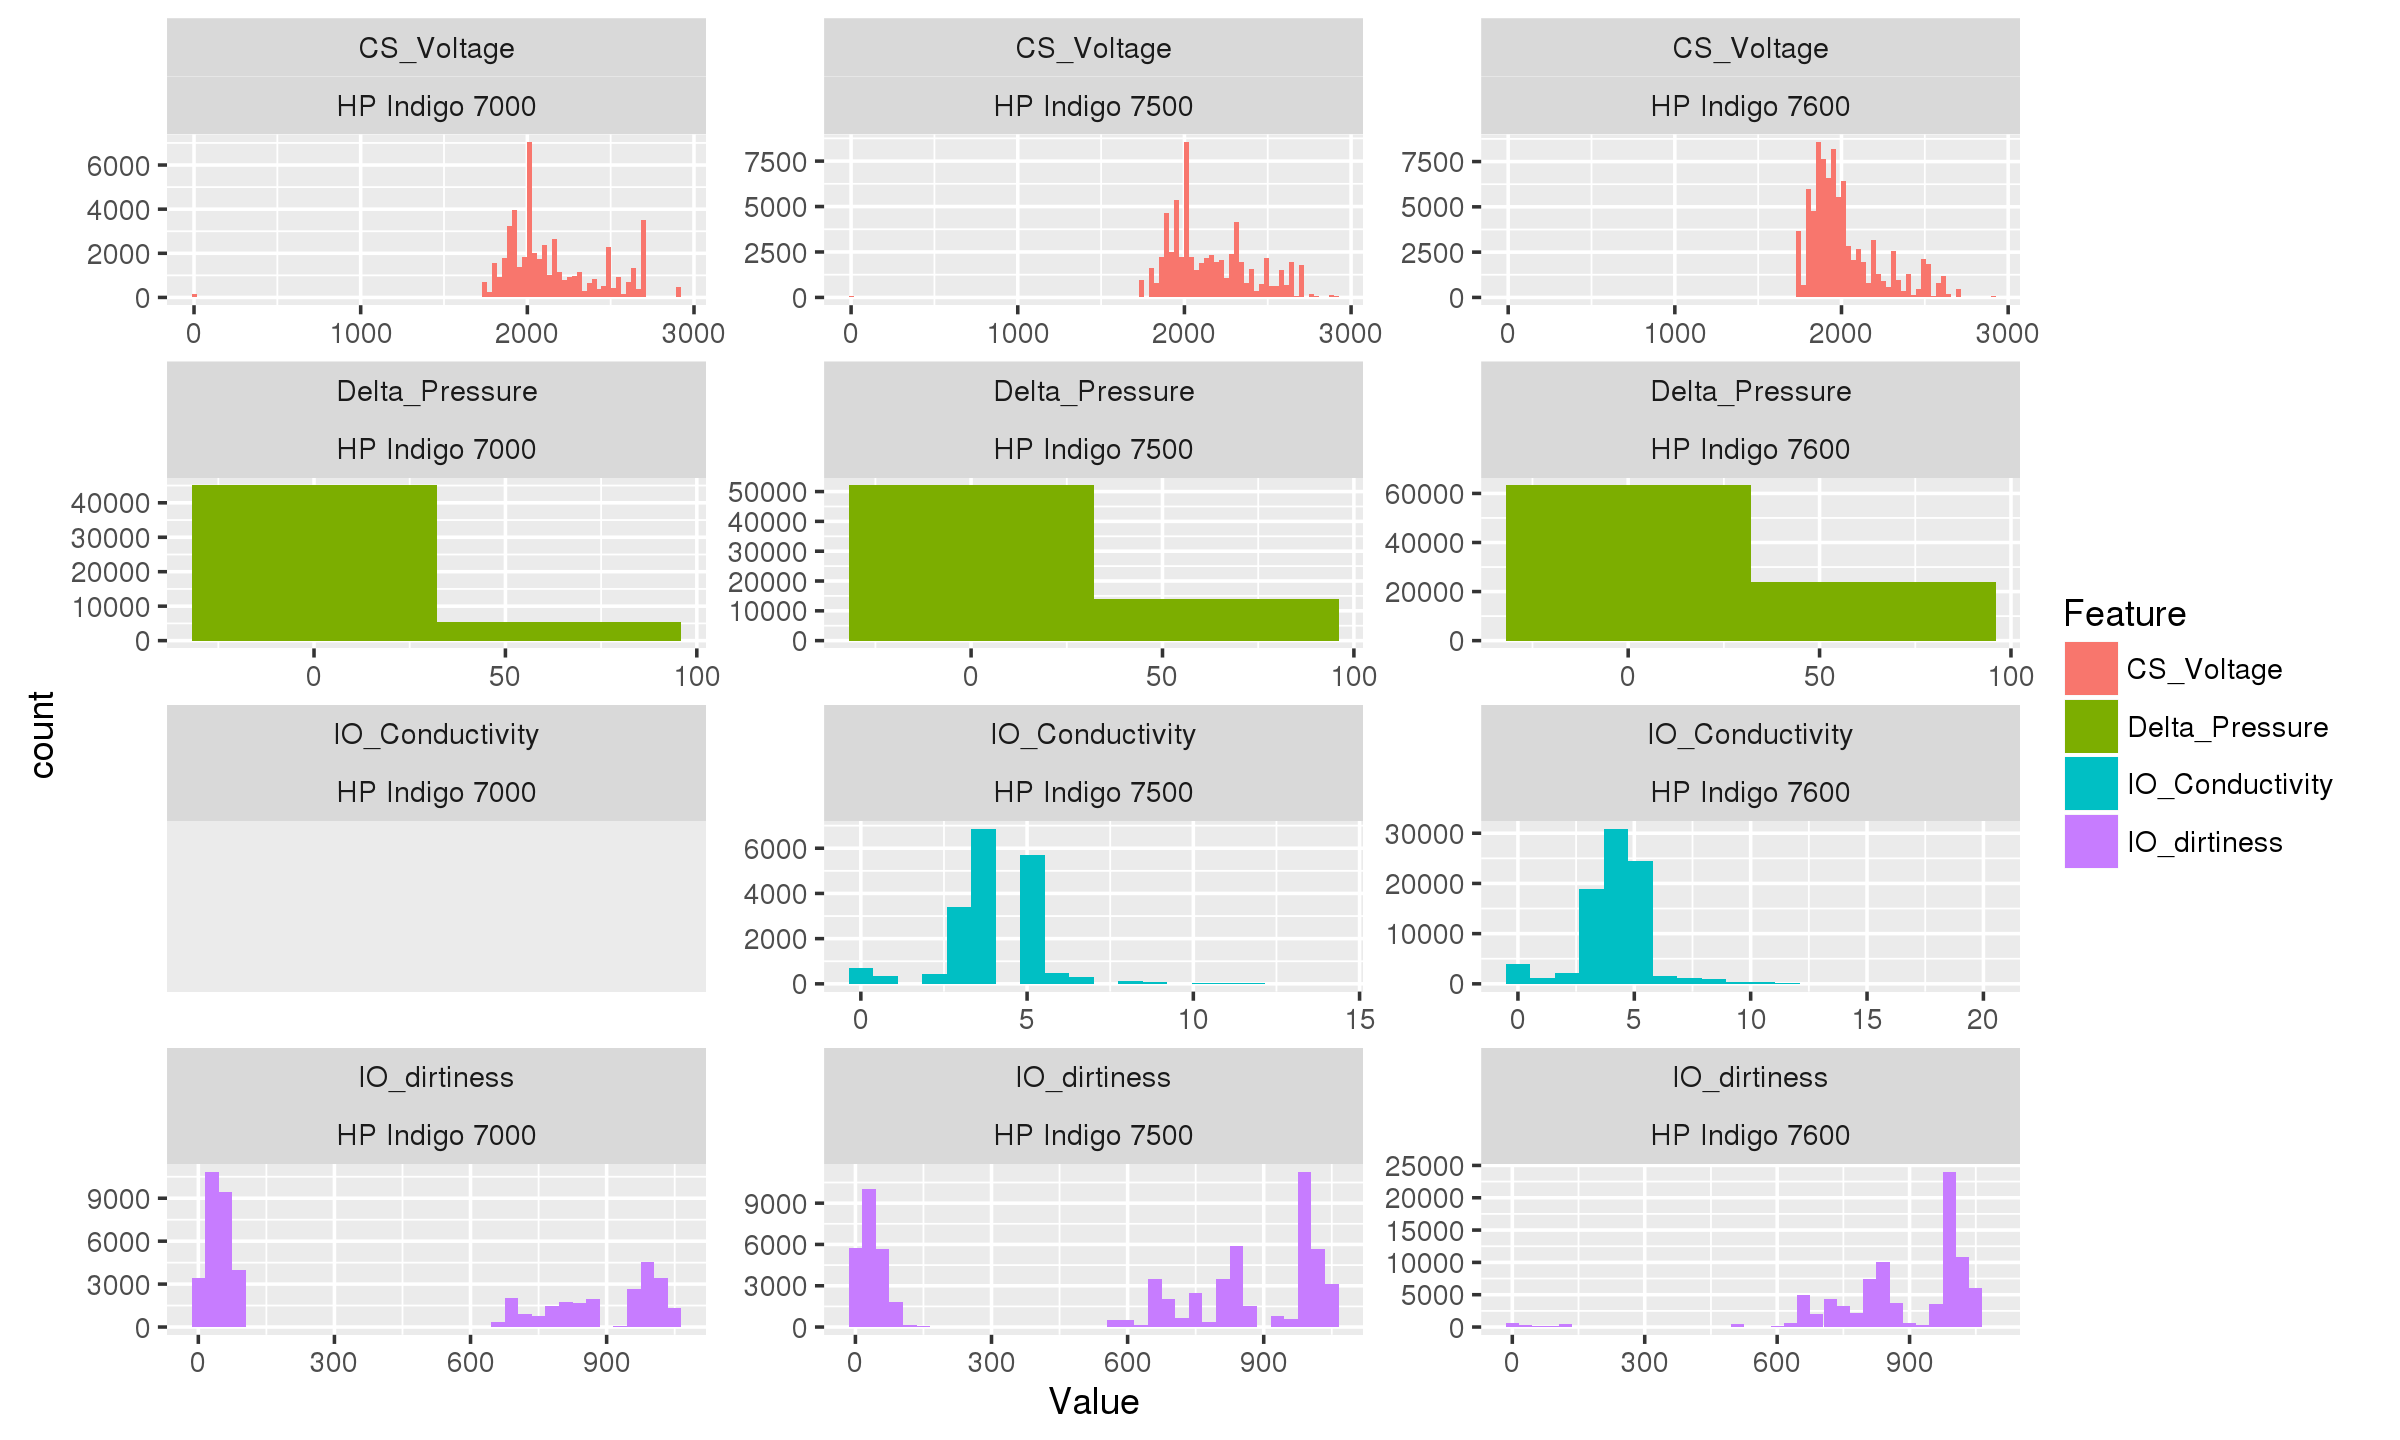

In [12]:
options(repr.plot.width=10, repr.plot.height = 6, repr.plot.res = 240)
hist_data <- temp %>% 
  select(Product_Line, IO_dirtiness, CS_Voltage, IO_Conductivity, Delta_Pressure) %>%
  gather(key = Feature, value = Value, IO_dirtiness, CS_Voltage, IO_Conductivity, Delta_Pressure)
hist_data %>%
  ggplot(aes(x = Value, fill = Feature)) +
  geom_histogram(data = hist_data %>% filter(Feature == "IO_dirtiness"), binwidth = 30) +
  geom_histogram(data = hist_data %>% filter(Feature == "CS_Voltage"), binwidth = 30) +
  geom_histogram(data = hist_data %>% filter(Feature == "IO_Conductivity"), bins = 20) +
  geom_histogram(data = hist_data %>% filter(Feature == "Delta_Pressure"), bins = 2) +
  facet_wrap( ~ Feature + Product_Line, scales = "free", ncol = 3)
rm(hist_data)

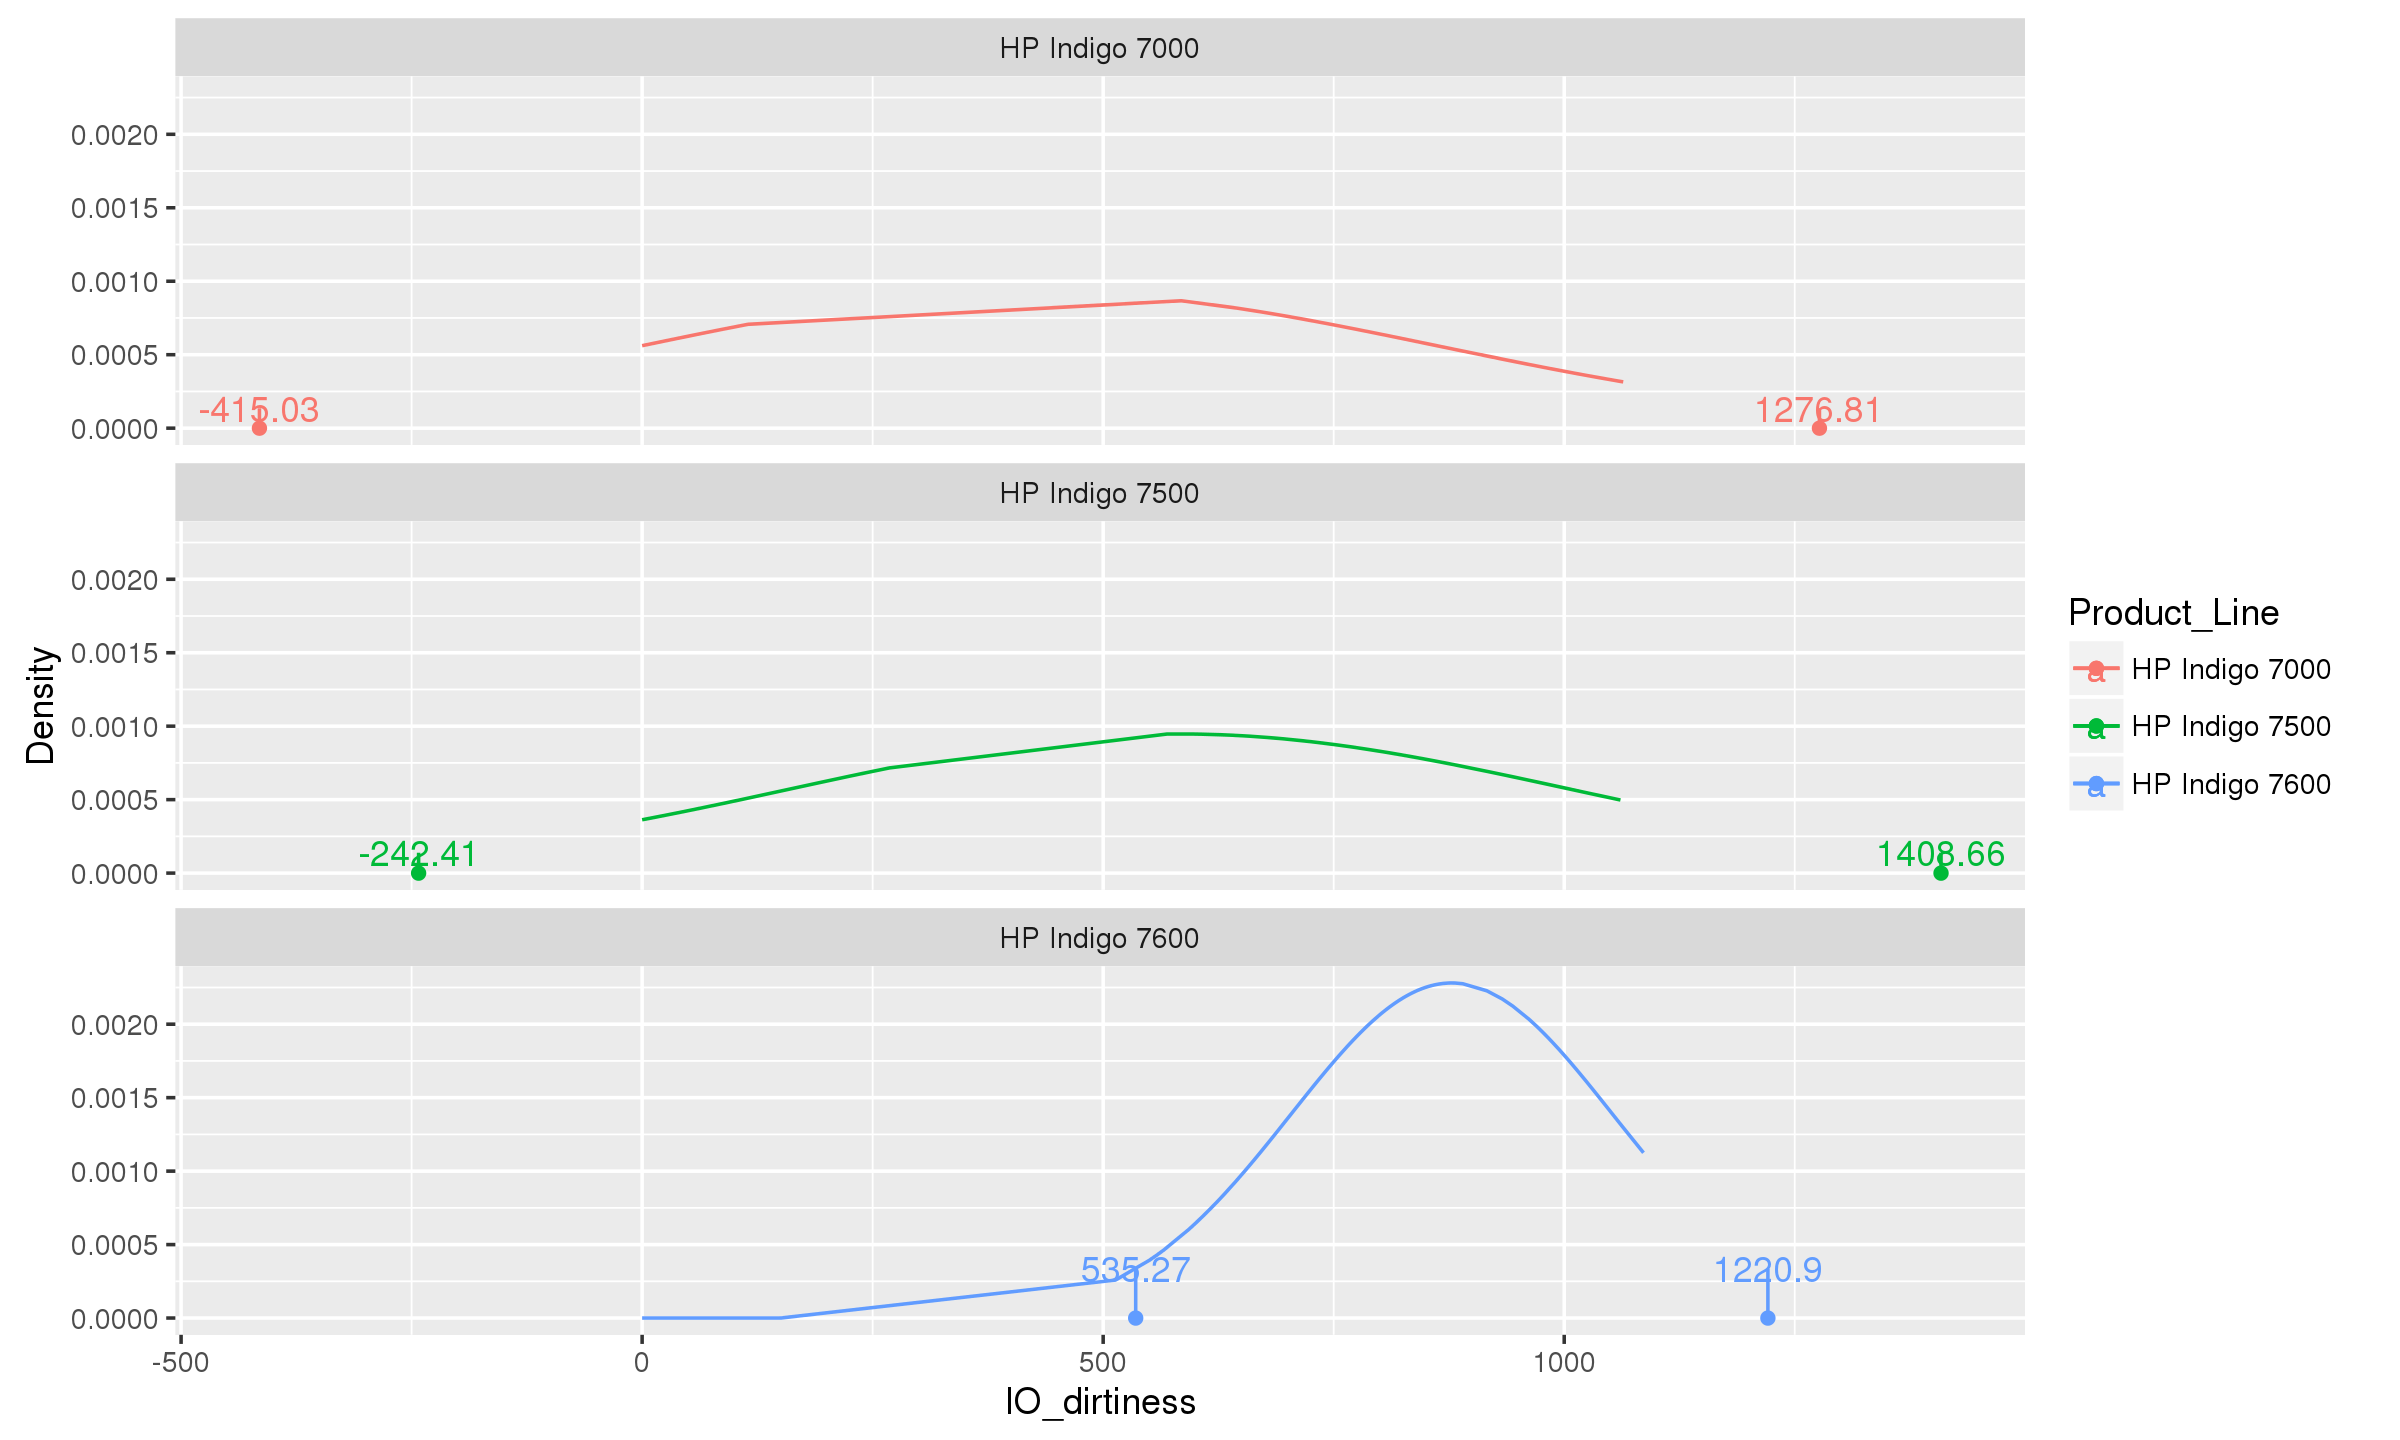

Warning message:
: Removed 1 rows containing missing values (geom_segment).Warning message:
: Removed 1 rows containing missing values (geom_segment).Warning message:
: Removed 1 rows containing missing values (geom_point).Warning message:
: Removed 1 rows containing missing values (geom_point).Warning message:
: Removed 1 rows containing missing values (geom_text).Warning message:
: Removed 1 rows containing missing values (geom_text).Warning message:
: Removed 1 rows containing missing values (geom_segment).Warning message:
: Removed 1 rows containing missing values (geom_segment).

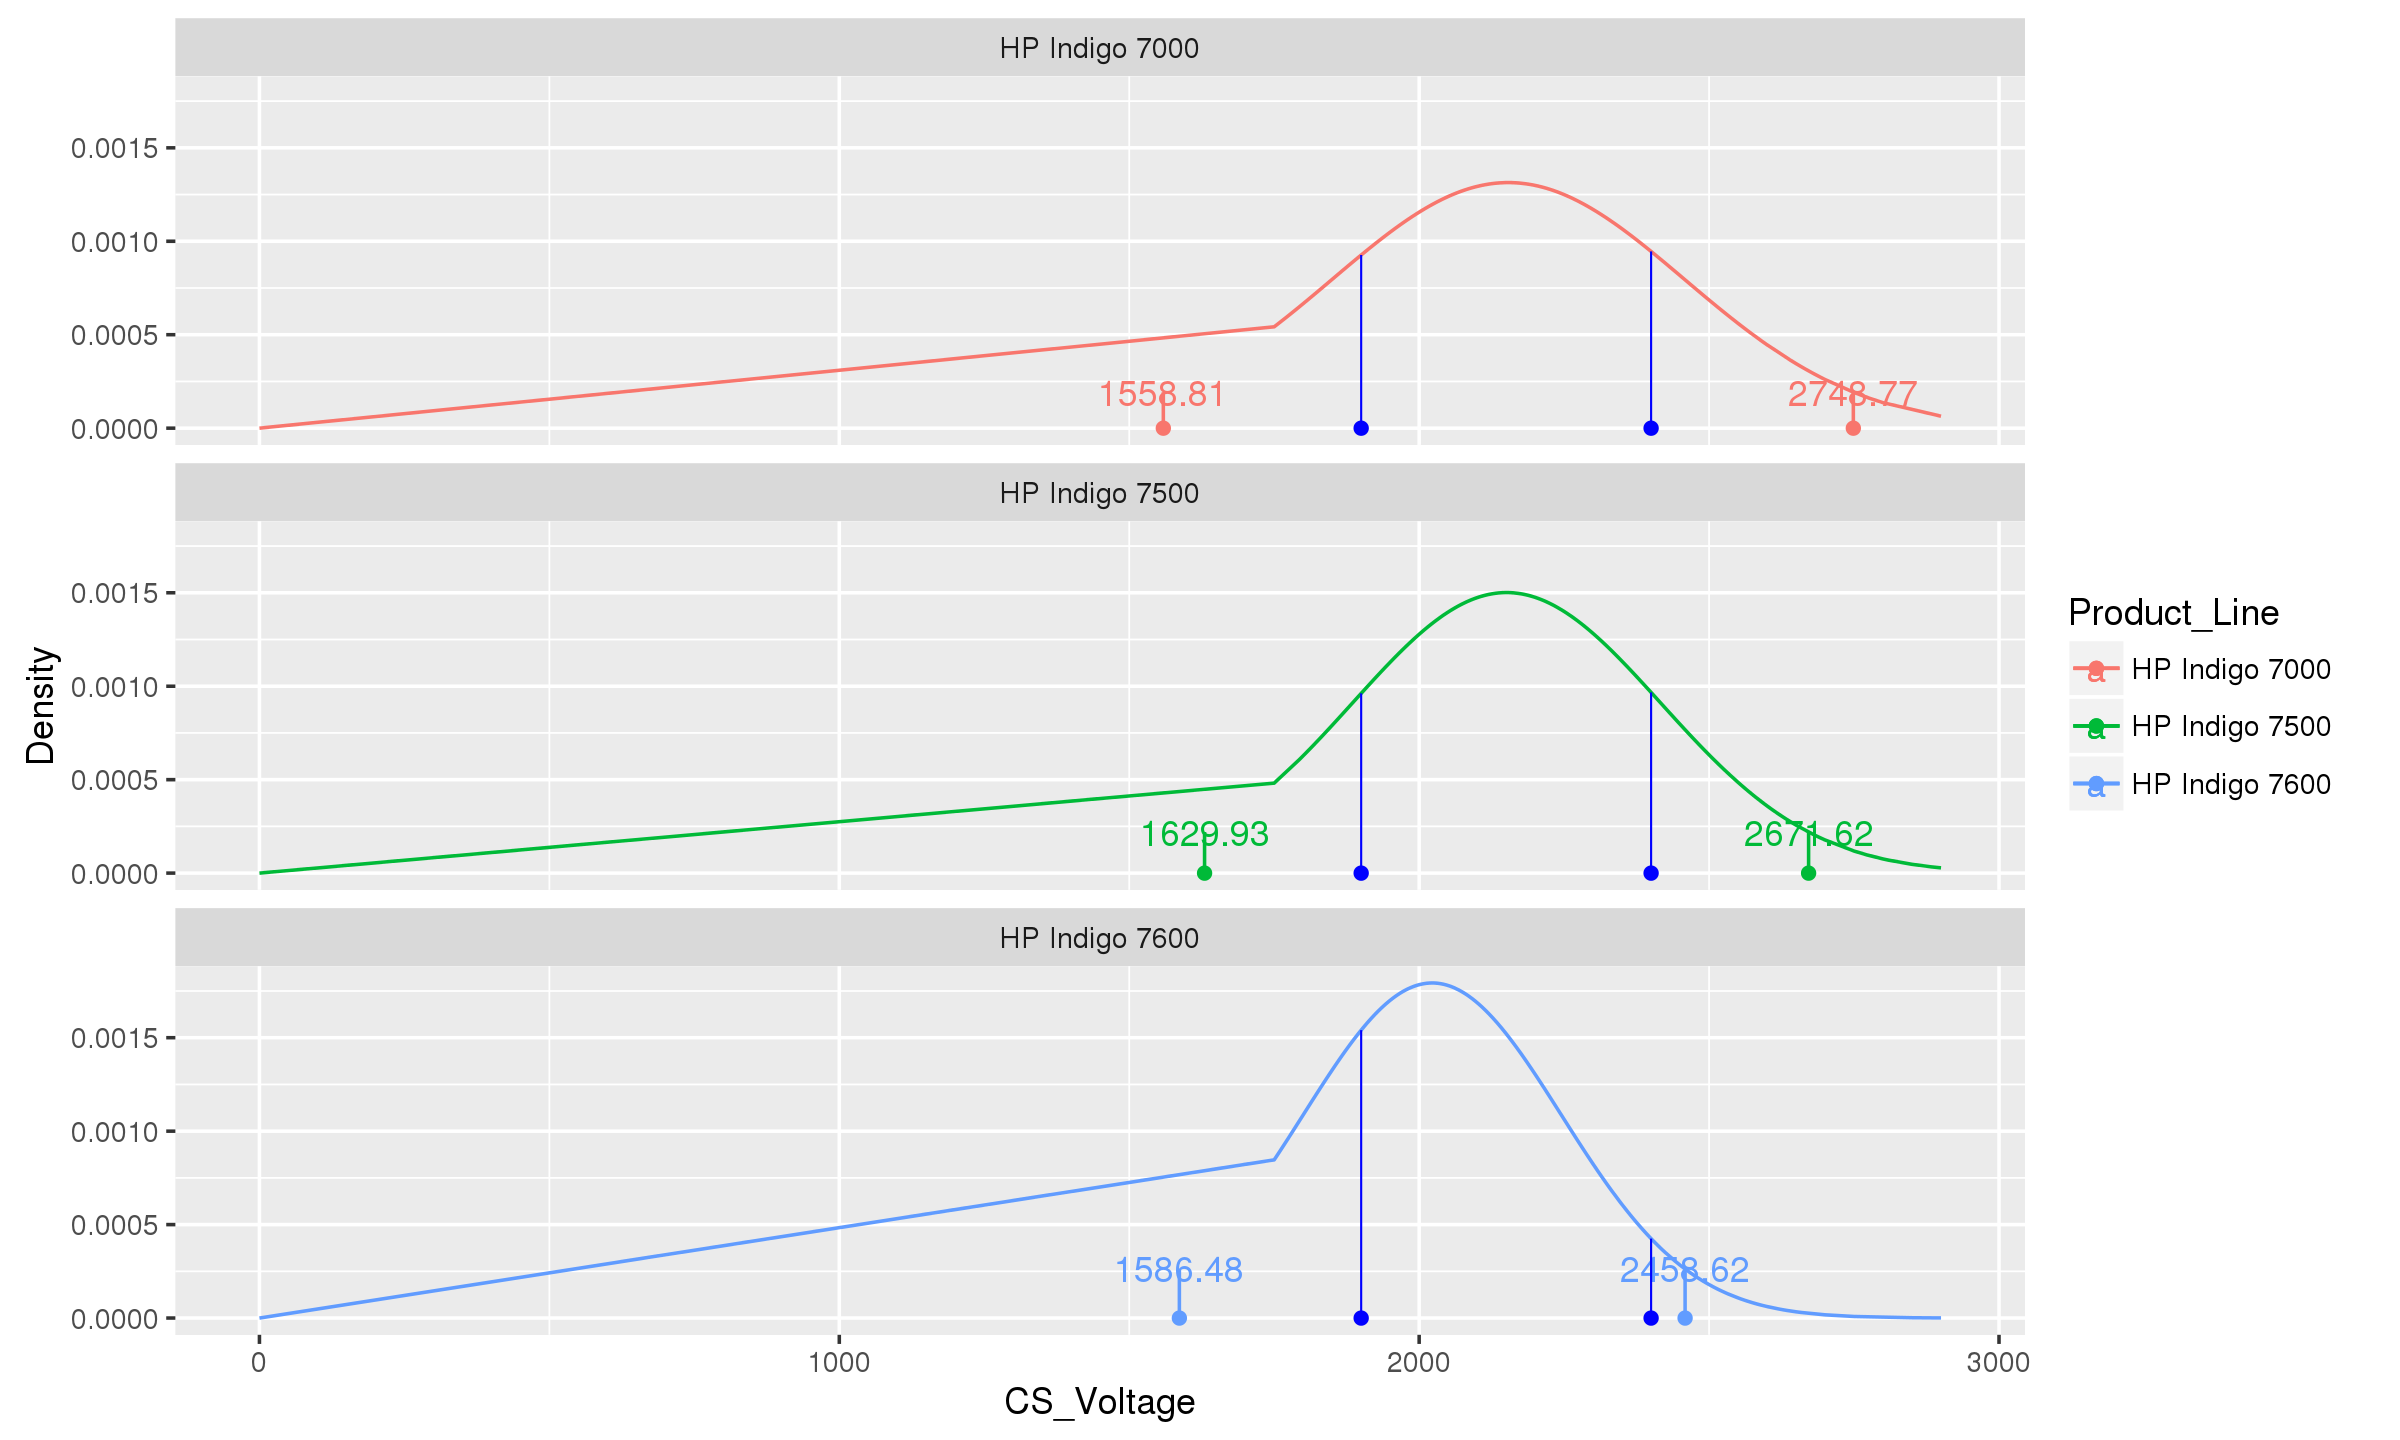

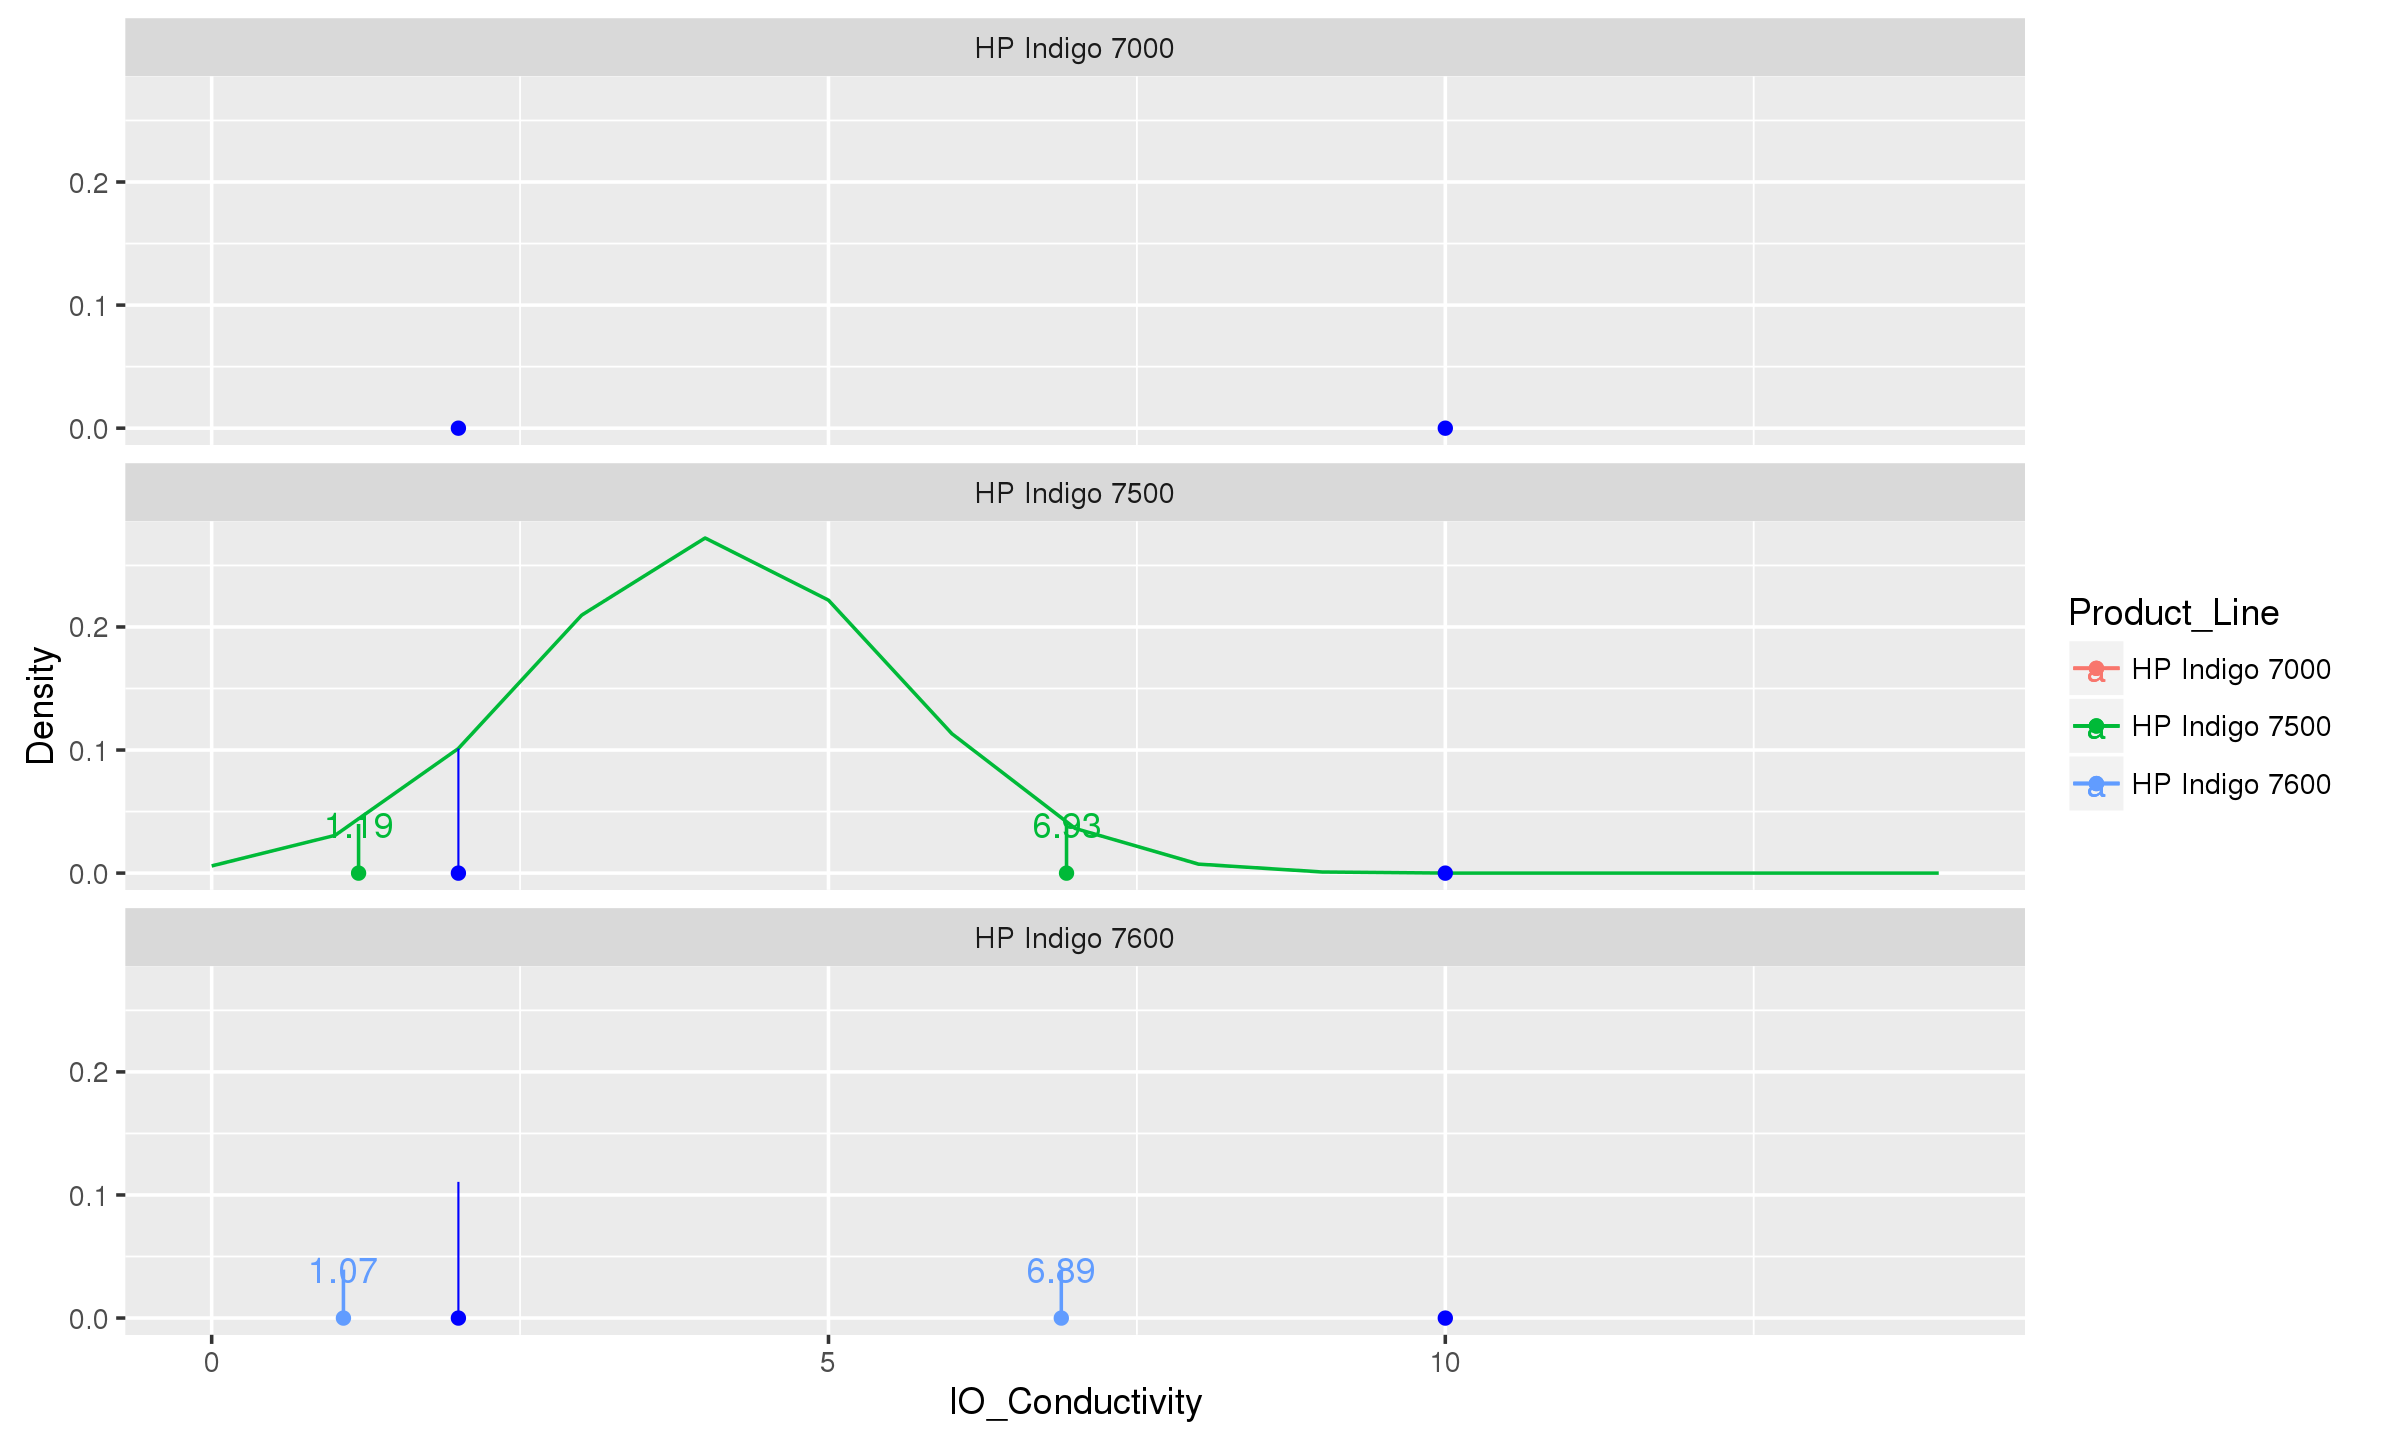

In [13]:
options(repr.plot.width=10, repr.plot.height = 6, repr.plot.res = 240)
 temp %>%  
     ggplot(aes(x = IO_dirtiness, y = IO_dirtiness.grouped_density, col = Product_Line)) +
     geom_line() +
     ylab("Density") +
     geom_segment(data = summ_pl, aes(x = IO_dirtiness.lower.Calculated, y = 0, xend = IO_dirtiness.lower.Calculated, yend = IO_dirtiness.lower.density)) +
     geom_segment(data = summ_pl, aes(x = IO_dirtiness.upper.Calculated, y = 0, xend = IO_dirtiness.upper.Calculated, yend = IO_dirtiness.upper.density)) +
     geom_point(data = summ_pl, aes(x = IO_dirtiness.lower.Calculated, y = 0)) +
     geom_point(data = summ_pl, aes(x = IO_dirtiness.upper.Calculated, y = 0)) +
     geom_text(data = summ_pl, aes(x = IO_dirtiness.lower.Calculated, y =IO_dirtiness.lower.density, label = round(IO_dirtiness.lower.Calculated,2))) +
     geom_text(data = summ_pl, aes(x = IO_dirtiness.upper.Calculated, y =IO_dirtiness.upper.density, label = round(IO_dirtiness.upper.Calculated,2))) + 
     facet_wrap(~ Product_Line, nrow = 3)
 temp %>% select(starts_with("CS_Voltage")) %>% 
      na.omit() %>% 
     ggplot(aes(x = CS_Voltage, y = CS_Voltage.grouped_density, col = Product_Line)) +
     geom_line() +
     ylab("Density") +
     geom_segment(data = summ_pl, aes(x = CS_Voltage.lower.Calculated, y = 0, xend = CS_Voltage.lower.Calculated, yend = CS_Voltage.lower.density)) +
     geom_segment(data = summ_pl, aes(x = CS_Voltage.upper.Calculated, y = 0, xend = CS_Voltage.upper.Calculated, yend = CS_Voltage.upper.density)) +
     geom_point(data = summ_pl, aes(x = CS_Voltage.lower.Calculated, y = 0)) +
     geom_point(data = summ_pl, aes(x = CS_Voltage.upper.Calculated, y = 0)) +
     geom_text(data = summ_pl, aes(x = CS_Voltage.lower.Calculated, y =CS_Voltage.lower.density, label = round(CS_Voltage.lower.Calculated,2))) +
     geom_text(data = summ_pl, aes(x = CS_Voltage.upper.Calculated, y =CS_Voltage.upper.density, label = round(CS_Voltage.upper.Calculated,2))) + 
     geom_segment(data = summ_pl, aes(x = 1900, y = 0, xend = 1900, yend = CS_Voltage.lower.Suggested_density), col = "blue", size = 0.3) +
     geom_segment(data = summ_pl, aes(x = 2400, y = 0, xend = 2400, yend = CS_Voltage.upper.Suggested_density), col = "blue", size = 0.3) +
     geom_point(data = summ_pl, aes(x = 1900, y = 0), col = "blue") +
     geom_point(data = summ_pl, aes(x = 2400, y = 0), col = "blue") +
     facet_wrap(~ Product_Line, nrow = 3)
 temp %>% select(starts_with("IO_Conductivity")) %>%
      na.omit() %>% 
     ggplot(aes(x = IO_Conductivity, y = IO_Conductivity.grouped_density, col = Product_Line)) +
     geom_line() +
     ylab("Density") +
     geom_segment(data = summ_pl, aes(x = IO_Conductivity.lower.Calculated, y = 0, xend = IO_Conductivity.lower.Calculated, yend = IO_Conductivity.lower.density)) +
     geom_segment(data = summ_pl, aes(x = IO_Conductivity.upper.Calculated, y = 0, xend = IO_Conductivity.upper.Calculated, yend = IO_Conductivity.upper.density)) +
     geom_point(data = summ_pl, aes(x = IO_Conductivity.lower.Calculated, y = 0)) +
     geom_point(data = summ_pl, aes(x = IO_Conductivity.upper.Calculated, y = 0)) +
     geom_text(data = summ_pl, aes(x = IO_Conductivity.lower.Calculated, y =IO_Conductivity.lower.density, label = round(IO_Conductivity.lower.Calculated,2))) +
     geom_text(data = summ_pl, aes(x = IO_Conductivity.upper.Calculated, y =IO_Conductivity.upper.density, label = round(IO_Conductivity.upper.Calculated,2))) + 
     geom_segment(data = summ_pl, aes(x = 2, y = 0, xend = 2, yend = IO_Conductivity.lower.Suggested_density), col = "blue", size = 0.3) +
     geom_segment(data = summ_pl, aes(x = 10, y = 0, xend = 10, yend = IO_Conductivity.upper.Suggested_density), col = "blue", size = 0.3) +
     geom_point(data = summ_pl, aes(x = 2, y = 0), col = "blue") +
     geom_point(data = summ_pl, aes(x = 10, y = 0), col = "blue") +
     facet_wrap(~ Product_Line, nrow = 3)

## Conclusions
Upper and lower limits were calculated for each press sensor based on a normal distribution.
The limits are calculated by determined the two-tail z-critical score for and alpha level of 0.05, then multiplying the standard deviation to calcalute the margin of error. We then add and subtract this from the mean to get the lower and upper limits. This is performed by the qnorm function, specifying the upper 2.5% critical region to get the upper limit and the lower 2.5% critical region for the lower limit.
More details about this approach can be read from here:
* [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)
* [Z-Critical Values](http://www.math.armstrong.edu/statsonline/5/5.3.2.html)


With the approach above in mind the following analysis can be made:

Considering all event presses in PRINT STATE and the statistical and nominal limits for the sensors:
* For PIP temperature, the suggested limits and the calculated limits are very close
* For IO temperature, the upper limit was close to the suggested value while the calculated lower limit was quite lower (-30%)
* For CS voltage, similar results from IO temparature with similar upper limits while lower limit was noticeably lower (-20%)
* For IO conductivity, both calculated upper and lower limits were considerable lower than the suggested ones. The calculated upper and lower limits were respectively 83% and 45% less than the nominal limits.

Considering all event presses in PRINT STATE grouped by product lines (Indigo 7000, Indigo 7500, Indigo 7600):

* Considering different product lines, normal distribution limits were quite similar for PIP temperature, IO temperature, vessel flow and CS Voltage

